In [ ]:
# Downloading Flickr8k Dataset from Kaggle
!kaggle datasets download -d adityajn105/flickr8k

# Unzipping the downloaded dataset
!unzip flickr8k.zip -d flickr8k


Streaming output truncated to the last 5000 lines.
  inflating: flickr8k/Images/2844846111_8c1cbfc75d.jpg  
  inflating: flickr8k/Images/2844963839_ff09cdb81f.jpg  
  inflating: flickr8k/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: flickr8k/Images/2845691057_d4ab89d889.jpg  
  inflating: flickr8k/Images/2845845721_d0bc113ff7.jpg  
  inflating: flickr8k/Images/2846037553_1a1de50709.jpg  
  inflating: flickr8k/Images/2846785268_904c5fcf9f.jpg  
  inflating: flickr8k/Images/2846843520_b0e6211478.jpg  
  inflating: flickr8k/Images/2847514745_9a35493023.jpg  
  inflating: flickr8k/Images/2847615962_c330bded6e.jpg  
  inflating: flickr8k/Images/2847859796_4d9cb0d31f.jpg  
  inflating: flickr8k/Images/2848266893_9693c66275.jpg  
  inflating: flickr8k/Images/2848571082_26454cb981.jpg  
  inflating: flickr8k/Images/2848895544_6d06210e9d.jpg  
  inflating: flickr8k/Images/2848977044_446a31d86e.jpg  
  inflating: flickr8k/Images/2849194983_2968c72832.jpg  
  inflating: flickr8k/Images/28507194

In [ ]:
# importing the necessary datasets
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# importing resnet cnn and printing the architecture
from tensorflow.keras.applications import ResNet50
model = ResNet50()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [ ]:
import concurrent.futures
from tqdm import tqdm

features = {}
directory = os.path.join("/content/flickr8k", 'Images')

# Each image is loaded, resized, converted to an array, reshaped, and preprocessed before being passed through the model for feature extraction.
def process_image(img_name):
    img_path = os.path.join(directory, img_name)
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = img_name.split('.')[0]
    return image_id, feature

#The ThreadPoolExecutor allows concurrent processing, speeding up feature extraction when working with multiple CPU cores.
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_image, os.listdir(directory)), total=len(os.listdir(directory))))

for image_id, feature in results:
    features[image_id] = feature

100%|██████████| 8091/8091 [08:05<00:00, 16.66it/s]


In [ ]:
pickle.dump(features, open(os.path.join("/content/flickr8k", 'features.pkl'), 'wb'))

In [ ]:
with open(os.path.join("/content/flickr8k", 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
with open(os.path.join('/content/flickr8k/captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
#process a document of captions (e.g., a CSV file) and map image IDs to their corresponding captions
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 645213.74it/s]


In [ ]:
len(mapping)

8091

In [ ]:
#clean and normalize text by converting to lowercase, removing unwanted characters, and formatting captions for sequence modeling (adding startseq and endseq tokens).
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s+', ' ')
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
clean(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
#extracts all the captions from the mapping dictionary into a single list, all_captions
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
#Initializes a Keras Tokenizer to preprocess text and build a vocabulary from the all_captions list. It also calculates the size of the vocabulary, including a padding index.
#Tokenizer() is used to tokenize text, splitting captions into words and assigning each a unique integer index.
#fit_on_texts builds the word index (a dictionary mapping words to unique integers) from the all_captions list.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8485

In [ ]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
#dividing the image_ids list into training and testing datasets by using a simple split based on a ratio (90% for training and 10% for testing). We have not divided into a val set keeping in mind the limited number of images
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
#processes image features, tokenized text sequences, and labels (next words in the caption sequence) into a format suitable for training with Keras or TensorFlow models.
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0] #Captions are converted into sequences of word indices using texts_to_sequences
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0] #pad_sequences ensures that in_seq is padded to the specified max_length
                    out_seq = to_categorical([out_seq], 	num_classes=vocab_size)[0] #Converts out_seq into a one-hot encoded vector with to_categorical
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
                    #For batch_size=1, a single batch will contain:
                    #X1: Image feature arrays.
                    #X2: Padded sequences representing caption text up to each word.
                    #y: One-hot encoded next-word predictions.
            if n == batch_size: #Collects samples into batches of size batch_size and yields them as a dictionary containing image features and text sequences (X1, X2) and the output labels (y).
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

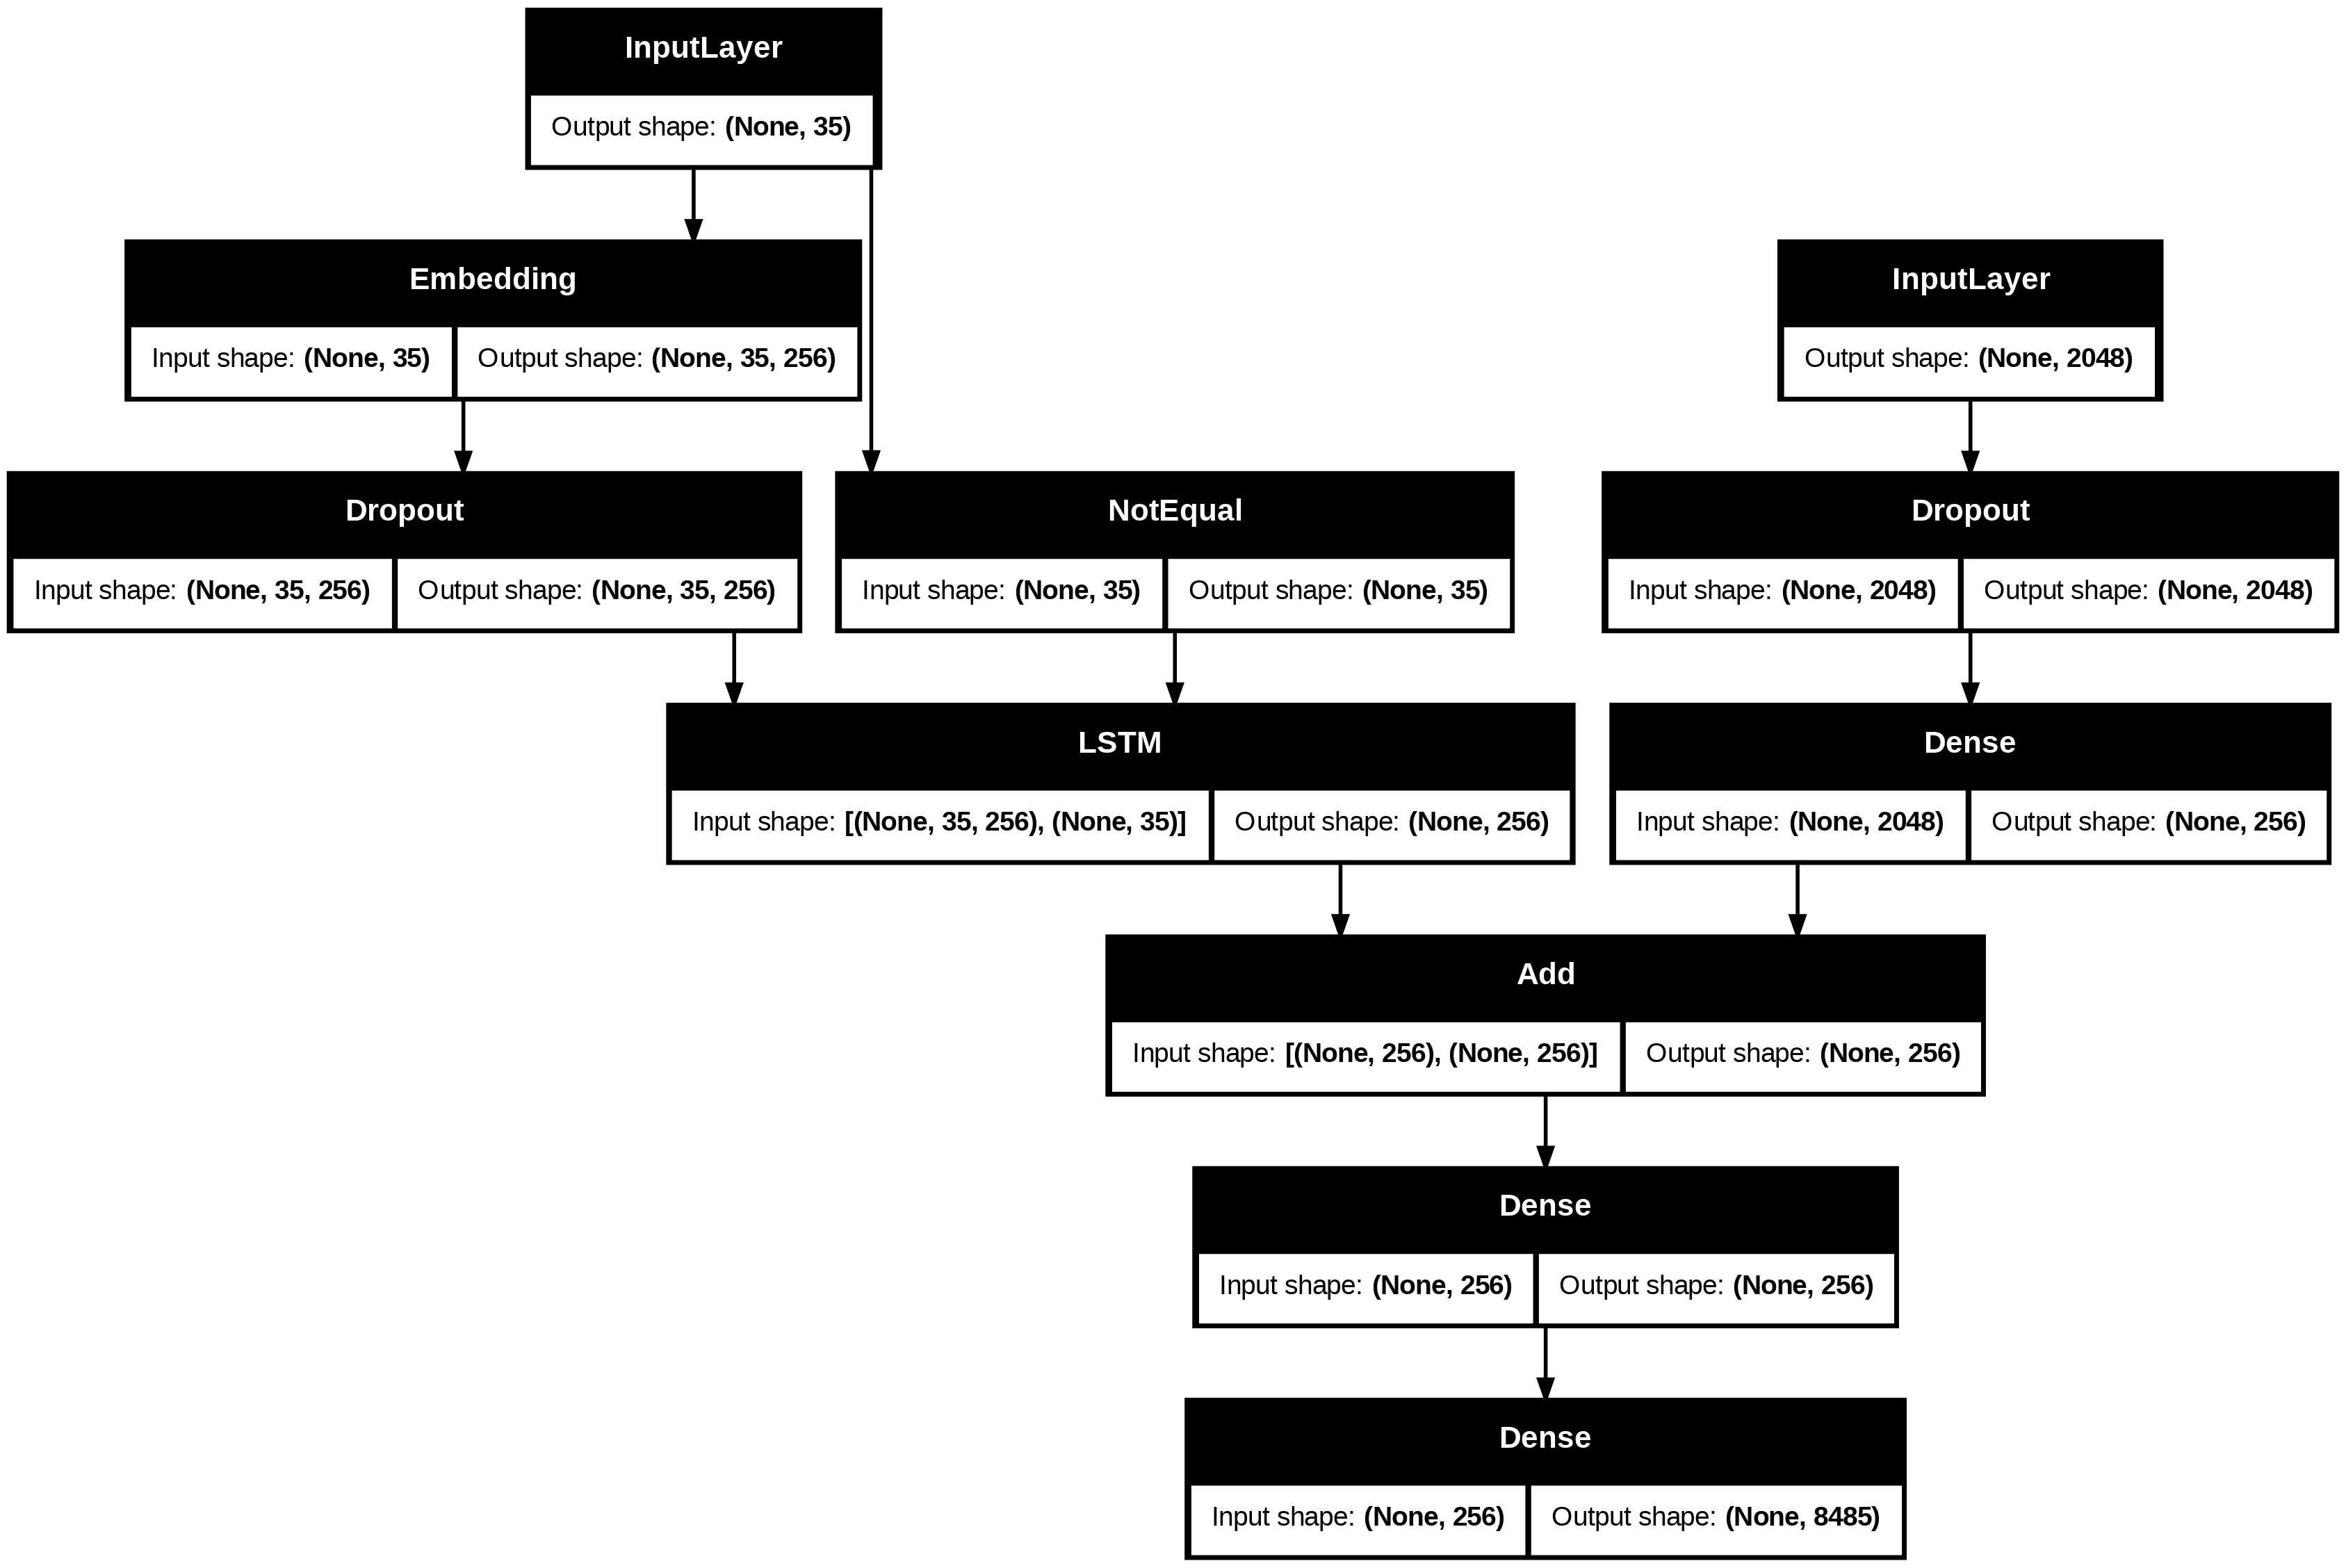

In [ ]:
# a multimodal architecture for combining image features and textual inputs i.e captions
inputs1 = Input(shape=(2048,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2) #Converts token indices into dense 256-dimensional vectors. The mask_zero=True ensures padding tokens are ignored by subsequent layers.
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2) #learn sequential dependencies in the caption.

decoder1 = add([fe2, se3]) #Combines outputs of the image feature extractor (fe2) and the text sequence processor (se3).
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

plot_model(model, show_shapes=True)


# # Load GloVe embeddings
# def load_glove_embeddings(glove_file, word_index, embedding_dim):
#      embeddings_index = {}
#      with open(glove_file, encoding='utf-8') as f:
#          for line in f:
#              values = line.split()
#              word = values[0]
#              coeffs = np.asarray(values[1:], dtype='float32')
#              embeddings_index[word] = coeffs

#      # Prepare embedding matrix
#      embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#      for word, i in word_index.items():
#          embedding_vector = embeddings_index.get(word)
#          if embedding_vector is not None:
#              embedding_matrix[i] = embedding_vector
#      return embedding_matrix

#  # Define parameters
#  word_index = tokenizer.word_index
#  vocab_size = len(word_index) + 1  # word_index should be created from your tokenizer
#  embedding_dim = 300
#  max_length = 100  # Adjust this as per your sequence length
#  glove_file = '/content/glove.6B.300d.txt'  # Path to your GloVe file (e.g., glove.6B.256d.txt)

#  # Load the embedding matrix
#  embedding_matrix = load_glove_embeddings(glove_file, word_index, embedding_dim)

#  # Define the model with GloVe embeddings
#  inputs1 = Input(shape=(4096,), name="image")
#  fe1 = Dropout(0.4)(inputs1)
#  fe2 = Dense(256, activation='relu')(fe1)

#  inputs2 = Input(shape=(max_length,), name="text")
#  se1 = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
#                  input_length=max_length, trainable=False)(inputs2)  # Freeze GloVe weights
#  se2 = Dropout(0.4)(se1)
#  se3 = LSTM(256)(se2)

#  decoder1 = add([fe2, se3])
#  decoder2 = Dense(256, activation='relu')(decoder1)
#  outputs = Dense(vocab_size, activation='softmax')(decoder2)

#  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
#  model.compile(loss='categorical_crossentropy', optimizer='adam')

#  # Plot the model
#  plot_model(model, show_shapes=True)

In [ ]:
# training the model for 20 epochs with a batch size of 32
import tensorflow.keras as keras
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save(f'model_{i}.keras')

227/227 ━━━━━━━━━━━━━━━━━━━━ 64s 257ms/step - loss: 5.8313
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - loss: 4.0463
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 258ms/step - loss: 3.5932
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 256ms/step - loss: 3.3247
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 259ms/step - loss: 3.1326
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 254ms/step - loss: 2.9808
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 262ms/step - loss: 2.8589
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 255ms/step - loss: 2.7589
227/227 ━━━━━━━━━━━━━━━━━━━━ 60s 263ms/step - loss: 2.6800
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - loss: 2.6209
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 261ms/step - loss: 2.5643
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - loss: 2.5031
227/227 ━━━━━━━━━━━━━━━━━━━━ 60s 262ms/step - loss: 2.4469
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 256ms/step - loss: 2.4055
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 259ms/step - loss: 2.3606
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 261ms/step - loss: 2.3213
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 260ms/step - loss: 2.28

In [ ]:
model.save('best_model.keras')

In [ ]:
#converts an integer index back to its corresponding word using the tokenizer.word_index dictionary
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
#iteratively predicts the next word until the max_length is reached or the endseq token is encountered
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length, padding='post')
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

In [ ]:
#calculating bleu scores (both unigram overlap and bigram overlap)
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    # calcuate BLEU score
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
  0%|          | 1/810 [00:00<11:44,  1.15it/s]

BLEU-1: 0.428571
BLEU-2: 0.181568


  0%|          | 2/810 [00:01<08:19,  1.62it/s]

BLEU-1: 0.500000
BLEU-2: 0.273861


  0%|          | 3/810 [00:02<10:06,  1.33it/s]

BLEU-1: 0.411765
BLEU-2: 0.199620


  0%|          | 4/810 [00:03<11:55,  1.13it/s]

BLEU-1: 0.416667
BLEU-2: 0.168550


  1%|          | 5/810 [00:03<10:01,  1.34it/s]

BLEU-1: 0.418182
BLEU-2: 0.158401


  1%|          | 6/810 [00:04<11:34,  1.16it/s]

BLEU-1: 0.438356
BLEU-2: 0.198131


  1%|          | 7/810 [00:05<10:21,  1.29it/s]

BLEU-1: 0.447059
BLEU-2: 0.214131


  1%|          | 8/810 [00:05<08:31,  1.57it/s]

BLEU-1: 0.478261
BLEU-2: 0.250259


  1%|          | 9/810 [00:06<07:58,  1.67it/s]

BLEU-1: 0.490196
BLEU-2: 0.251498


  1%|          | 10/810 [00:06<08:00,  1.66it/s]

BLEU-1: 0.526316
BLEU-2: 0.284555


  1%|▏         | 11/810 [00:07<07:09,  1.86it/s]

BLEU-1: 0.549180
BLEU-2: 0.314565


  1%|▏         | 12/810 [00:08<08:35,  1.55it/s]

BLEU-1: 0.568345
BLEU-2: 0.320825


  2%|▏         | 13/810 [00:08<08:51,  1.50it/s]

BLEU-1: 0.568627
BLEU-2: 0.324965


  2%|▏         | 14/810 [00:09<09:55,  1.34it/s]

BLEU-1: 0.538012
BLEU-2: 0.298492


  2%|▏         | 15/810 [00:10<08:56,  1.48it/s]

BLEU-1: 0.533333
BLEU-2: 0.295420


  2%|▏         | 16/810 [00:11<09:54,  1.34it/s]

BLEU-1: 0.527919
BLEU-2: 0.290833


  2%|▏         | 17/810 [00:11<08:25,  1.57it/s]

BLEU-1: 0.541463
BLEU-2: 0.293945


  2%|▏         | 18/810 [00:12<07:56,  1.66it/s]

BLEU-1: 0.544186
BLEU-2: 0.297314


  2%|▏         | 19/810 [00:13<08:59,  1.47it/s]

BLEU-1: 0.532468
BLEU-2: 0.287896


  2%|▏         | 20/810 [00:13<09:03,  1.45it/s]

BLEU-1: 0.532787
BLEU-2: 0.288527


  3%|▎         | 21/810 [00:14<10:04,  1.31it/s]

BLEU-1: 0.531008
BLEU-2: 0.284006


  3%|▎         | 22/810 [00:15<11:21,  1.16it/s]

BLEU-1: 0.531136
BLEU-2: 0.287275


  3%|▎         | 23/810 [00:16<11:08,  1.18it/s]

BLEU-1: 0.537102
BLEU-2: 0.294555


  3%|▎         | 24/810 [00:17<10:52,  1.20it/s]

BLEU-1: 0.539792
BLEU-2: 0.295954


  3%|▎         | 25/810 [00:17<09:02,  1.45it/s]

BLEU-1: 0.543919
BLEU-2: 0.303851


  3%|▎         | 26/810 [00:18<07:33,  1.73it/s]

BLEU-1: 0.549669
BLEU-2: 0.309184


  3%|▎         | 27/810 [00:18<08:16,  1.58it/s]

BLEU-1: 0.541139
BLEU-2: 0.299796


  3%|▎         | 28/810 [00:19<07:10,  1.82it/s]

BLEU-1: 0.538700
BLEU-2: 0.299130


  4%|▎         | 29/810 [00:19<07:39,  1.70it/s]

BLEU-1: 0.540299
BLEU-2: 0.300083


  4%|▎         | 30/810 [00:20<08:14,  1.58it/s]

BLEU-1: 0.551724
BLEU-2: 0.308908


  4%|▍         | 31/810 [00:21<07:52,  1.65it/s]

BLEU-1: 0.555866
BLEU-2: 0.316692


  4%|▍         | 32/810 [00:21<08:01,  1.62it/s]

BLEU-1: 0.556757
BLEU-2: 0.316985


  4%|▍         | 33/810 [00:22<07:56,  1.63it/s]

BLEU-1: 0.551181
BLEU-2: 0.310830


  4%|▍         | 34/810 [00:22<07:23,  1.75it/s]

BLEU-1: 0.552699
BLEU-2: 0.310689


  4%|▍         | 35/810 [00:23<07:04,  1.83it/s]

BLEU-1: 0.557789
BLEU-2: 0.316037


  4%|▍         | 36/810 [00:24<07:38,  1.69it/s]

BLEU-1: 0.557178
BLEU-2: 0.313151


  5%|▍         | 37/810 [00:24<08:02,  1.60it/s]

BLEU-1: 0.558962
BLEU-2: 0.315690


  5%|▍         | 38/810 [00:25<09:35,  1.34it/s]

BLEU-1: 0.557562
BLEU-2: 0.314837


  5%|▍         | 39/810 [00:26<10:13,  1.26it/s]

BLEU-1: 0.550000
BLEU-2: 0.308817


  5%|▍         | 40/810 [00:27<10:33,  1.21it/s]

BLEU-1: 0.543158
BLEU-2: 0.301912


  5%|▌         | 41/810 [00:28<10:43,  1.20it/s]

BLEU-1: 0.539095
BLEU-2: 0.299411


  5%|▌         | 42/810 [00:29<10:28,  1.22it/s]

BLEU-1: 0.546371
BLEU-2: 0.308340


  5%|▌         | 43/810 [00:30<12:48,  1.00s/it]

BLEU-1: 0.551657
BLEU-2: 0.312122


  5%|▌         | 44/810 [00:31<10:08,  1.26it/s]

BLEU-1: 0.556840
BLEU-2: 0.317517


  6%|▌         | 45/810 [00:31<10:26,  1.22it/s]

BLEU-1: 0.557009
BLEU-2: 0.318074


  6%|▌         | 46/810 [00:32<09:49,  1.30it/s]

BLEU-1: 0.561243
BLEU-2: 0.324504


  6%|▌         | 47/810 [00:33<09:55,  1.28it/s]

BLEU-1: 0.561497
BLEU-2: 0.327194


  6%|▌         | 48/810 [00:33<09:16,  1.37it/s]

BLEU-1: 0.561189
BLEU-2: 0.327257


  6%|▌         | 49/810 [00:34<08:33,  1.48it/s]

BLEU-1: 0.560137
BLEU-2: 0.325795


  6%|▌         | 50/810 [00:35<08:41,  1.46it/s]

BLEU-1: 0.566387
BLEU-2: 0.335020


  6%|▋         | 51/810 [00:35<07:54,  1.60it/s]

BLEU-1: 0.571192
BLEU-2: 0.343148


  6%|▋         | 52/810 [00:36<08:12,  1.54it/s]

BLEU-1: 0.567261
BLEU-2: 0.341269


  7%|▋         | 53/810 [00:37<07:58,  1.58it/s]

BLEU-1: 0.566879
BLEU-2: 0.341077


  7%|▋         | 54/810 [00:37<08:31,  1.48it/s]

BLEU-1: 0.566978
BLEU-2: 0.340161


  7%|▋         | 55/810 [00:38<08:04,  1.56it/s]

BLEU-1: 0.567485
BLEU-2: 0.340541


  7%|▋         | 56/810 [00:38<07:55,  1.59it/s]

BLEU-1: 0.567119
BLEU-2: 0.340372


  7%|▋         | 57/810 [00:39<07:57,  1.58it/s]

BLEU-1: 0.567407
BLEU-2: 0.341472


  7%|▋         | 58/810 [00:40<07:26,  1.69it/s]

BLEU-1: 0.573099
BLEU-2: 0.348942


  7%|▋         | 59/810 [00:40<07:02,  1.78it/s]

BLEU-1: 0.574315
BLEU-2: 0.348404


  7%|▋         | 60/810 [00:41<08:25,  1.48it/s]

BLEU-1: 0.568794
BLEU-2: 0.343756


  8%|▊         | 61/810 [00:42<08:10,  1.53it/s]

BLEU-1: 0.573633
BLEU-2: 0.349704


  8%|▊         | 62/810 [00:42<08:52,  1.41it/s]

BLEU-1: 0.575380
BLEU-2: 0.351577


  8%|▊         | 63/810 [00:43<09:49,  1.27it/s]

BLEU-1: 0.573370
BLEU-2: 0.349042


  8%|▊         | 64/810 [00:44<08:33,  1.45it/s]

BLEU-1: 0.572581
BLEU-2: 0.349420


  8%|▊         | 65/810 [00:45<08:55,  1.39it/s]

BLEU-1: 0.568602
BLEU-2: 0.344922


  8%|▊         | 66/810 [00:45<09:13,  1.34it/s]

BLEU-1: 0.568653
BLEU-2: 0.342924


  8%|▊         | 67/810 [00:46<08:30,  1.46it/s]

BLEU-1: 0.569054
BLEU-2: 0.344363


  8%|▊         | 68/810 [00:47<09:13,  1.34it/s]

BLEU-1: 0.565163
BLEU-2: 0.340778


  9%|▊         | 69/810 [00:47<08:18,  1.49it/s]

BLEU-1: 0.567534
BLEU-2: 0.344134


  9%|▊         | 70/810 [00:48<07:52,  1.57it/s]

BLEU-1: 0.567931
BLEU-2: 0.343284


  9%|▉         | 71/810 [00:49<07:57,  1.55it/s]

BLEU-1: 0.571773
BLEU-2: 0.346319


  9%|▉         | 72/810 [00:50<08:44,  1.41it/s]

BLEU-1: 0.574645
BLEU-2: 0.352573


  9%|▉         | 73/810 [00:50<07:48,  1.57it/s]

BLEU-1: 0.575117
BLEU-2: 0.352180


  9%|▉         | 74/810 [00:51<07:55,  1.55it/s]

BLEU-1: 0.578216
BLEU-2: 0.358117


  9%|▉         | 75/810 [00:51<07:24,  1.65it/s]

BLEU-1: 0.582569
BLEU-2: 0.364737


  9%|▉         | 76/810 [00:52<07:43,  1.58it/s]

BLEU-1: 0.584842
BLEU-2: 0.365931


 10%|▉         | 77/810 [00:53<08:20,  1.47it/s]

BLEU-1: 0.581292
BLEU-2: 0.361919


 10%|▉         | 78/810 [00:54<09:11,  1.33it/s]

BLEU-1: 0.580044
BLEU-2: 0.360635


 10%|▉         | 79/810 [00:54<09:36,  1.27it/s]

BLEU-1: 0.580715
BLEU-2: 0.360613


 10%|▉         | 80/810 [00:55<09:04,  1.34it/s]

BLEU-1: 0.582170
BLEU-2: 0.363361


 10%|█         | 81/810 [00:56<09:12,  1.32it/s]

BLEU-1: 0.581915
BLEU-2: 0.361586


 10%|█         | 82/810 [00:57<08:48,  1.38it/s]

BLEU-1: 0.578782
BLEU-2: 0.359251


 10%|█         | 83/810 [00:57<07:51,  1.54it/s]

BLEU-1: 0.579605
BLEU-2: 0.359705


 10%|█         | 84/810 [00:57<06:52,  1.76it/s]

BLEU-1: 0.578512
BLEU-2: 0.359057


 10%|█         | 85/810 [00:58<06:13,  1.94it/s]

BLEU-1: 0.577436
BLEU-2: 0.357511


 11%|█         | 86/810 [00:58<07:01,  1.72it/s]

BLEU-1: 0.577935
BLEU-2: 0.357974


 11%|█         | 87/810 [00:59<06:53,  1.75it/s]

BLEU-1: 0.578156
BLEU-2: 0.358046


 11%|█         | 88/810 [01:00<07:37,  1.58it/s]

BLEU-1: 0.575099
BLEU-2: 0.354577


 11%|█         | 89/810 [01:01<07:54,  1.52it/s]

BLEU-1: 0.576585
BLEU-2: 0.356228


 11%|█         | 90/810 [01:01<07:03,  1.70it/s]

BLEU-1: 0.576960
BLEU-2: 0.355018


 11%|█         | 91/810 [01:02<07:34,  1.58it/s]

BLEU-1: 0.571702
BLEU-2: 0.351169


 11%|█▏        | 92/810 [01:02<07:32,  1.59it/s]

BLEU-1: 0.572375
BLEU-2: 0.351243


 11%|█▏        | 93/810 [01:03<07:45,  1.54it/s]

BLEU-1: 0.570627
BLEU-2: 0.349562


 12%|█▏        | 94/810 [01:04<07:18,  1.63it/s]

BLEU-1: 0.569573
BLEU-2: 0.348648


 12%|█▏        | 95/810 [01:04<07:51,  1.52it/s]

BLEU-1: 0.567766
BLEU-2: 0.346640


 12%|█▏        | 96/810 [01:05<07:14,  1.64it/s]

BLEU-1: 0.570391
BLEU-2: 0.350940


 12%|█▏        | 97/810 [01:05<07:25,  1.60it/s]

BLEU-1: 0.572327
BLEU-2: 0.350432


 12%|█▏        | 98/810 [01:06<07:04,  1.68it/s]

BLEU-1: 0.573595
BLEU-2: 0.350418


 12%|█▏        | 99/810 [01:07<07:34,  1.56it/s]

BLEU-1: 0.573451
BLEU-2: 0.350603


 12%|█▏        | 100/810 [01:08<08:24,  1.41it/s]

BLEU-1: 0.573181
BLEU-2: 0.348832


 12%|█▏        | 101/810 [01:08<08:26,  1.40it/s]

BLEU-1: 0.571802
BLEU-2: 0.347247


 13%|█▎        | 102/810 [01:09<07:47,  1.51it/s]

BLEU-1: 0.573529
BLEU-2: 0.349904


 13%|█▎        | 103/810 [01:09<07:21,  1.60it/s]

BLEU-1: 0.572041
BLEU-2: 0.348740


 13%|█▎        | 104/810 [01:10<06:33,  1.80it/s]

BLEU-1: 0.574595
BLEU-2: 0.351606


 13%|█▎        | 105/810 [01:10<06:56,  1.69it/s]

BLEU-1: 0.574684
BLEU-2: 0.352112


 13%|█▎        | 106/810 [01:11<07:44,  1.51it/s]

BLEU-1: 0.573333
BLEU-2: 0.350189


 13%|█▎        | 107/810 [01:12<06:44,  1.74it/s]

BLEU-1: 0.573322
BLEU-2: 0.349975


 13%|█▎        | 108/810 [01:12<06:54,  1.69it/s]

BLEU-1: 0.572250
BLEU-2: 0.349547


 13%|█▎        | 109/810 [01:13<06:22,  1.83it/s]

BLEU-1: 0.571778
BLEU-2: 0.348306


 14%|█▎        | 110/810 [01:13<06:38,  1.76it/s]

BLEU-1: 0.573161
BLEU-2: 0.350094


 14%|█▎        | 111/810 [01:14<06:34,  1.77it/s]

BLEU-1: 0.575782
BLEU-2: 0.351670


 14%|█▍        | 112/810 [01:15<06:59,  1.66it/s]

BLEU-1: 0.576648
BLEU-2: 0.353102


 14%|█▍        | 113/810 [01:16<08:03,  1.44it/s]

BLEU-1: 0.576471
BLEU-2: 0.352173


 14%|█▍        | 114/810 [01:16<08:09,  1.42it/s]

BLEU-1: 0.575311
BLEU-2: 0.351413


 14%|█▍        | 115/810 [01:17<08:18,  1.39it/s]

BLEU-1: 0.574942
BLEU-2: 0.350211


 14%|█▍        | 116/810 [01:18<08:44,  1.32it/s]

BLEU-1: 0.572948
BLEU-2: 0.348244


 14%|█▍        | 117/810 [01:19<09:01,  1.28it/s]

BLEU-1: 0.571751
BLEU-2: 0.347905


 15%|█▍        | 118/810 [01:19<08:21,  1.38it/s]

BLEU-1: 0.571001
BLEU-2: 0.346821


 15%|█▍        | 119/810 [01:20<08:54,  1.29it/s]

BLEU-1: 0.572276
BLEU-2: 0.347136


 15%|█▍        | 120/810 [01:22<11:13,  1.02it/s]

BLEU-1: 0.568814
BLEU-2: 0.343856


 15%|█▍        | 121/810 [01:22<10:28,  1.10it/s]

BLEU-1: 0.567078
BLEU-2: 0.341689


 15%|█▌        | 122/810 [01:23<09:48,  1.17it/s]

BLEU-1: 0.565374
BLEU-2: 0.339559


 15%|█▌        | 123/810 [01:24<09:54,  1.16it/s]

BLEU-1: 0.564631
BLEU-2: 0.338001


 15%|█▌        | 124/810 [01:25<09:50,  1.16it/s]

BLEU-1: 0.564301
BLEU-2: 0.338009


 15%|█▌        | 125/810 [01:25<09:06,  1.25it/s]

BLEU-1: 0.563459
BLEU-2: 0.336464


 16%|█▌        | 126/810 [01:26<09:21,  1.22it/s]

BLEU-1: 0.562457
BLEU-2: 0.335017


 16%|█▌        | 127/810 [01:27<09:23,  1.21it/s]

BLEU-1: 0.562158
BLEU-2: 0.335684


 16%|█▌        | 128/810 [01:28<08:46,  1.30it/s]

BLEU-1: 0.561356
BLEU-2: 0.335442


 16%|█▌        | 129/810 [01:28<07:58,  1.42it/s]

BLEU-1: 0.561321
BLEU-2: 0.334440


 16%|█▌        | 130/810 [01:29<07:29,  1.51it/s]

BLEU-1: 0.562249
BLEU-2: 0.334843


 16%|█▌        | 131/810 [01:29<07:05,  1.60it/s]

BLEU-1: 0.563540
BLEU-2: 0.335475


 16%|█▋        | 132/810 [01:30<06:31,  1.73it/s]

BLEU-1: 0.563203
BLEU-2: 0.334523


 16%|█▋        | 133/810 [01:31<07:18,  1.54it/s]

BLEU-1: 0.563934
BLEU-2: 0.334387


 17%|█▋        | 134/810 [01:32<09:47,  1.15it/s]

BLEU-1: 0.560802
BLEU-2: 0.332284


 17%|█▋        | 135/810 [01:33<09:26,  1.19it/s]

BLEU-1: 0.560772
BLEU-2: 0.331338


 17%|█▋        | 136/810 [01:34<10:07,  1.11it/s]

BLEU-1: 0.560944
BLEU-2: 0.331889


 17%|█▋        | 137/810 [01:35<10:29,  1.07it/s]

BLEU-1: 0.558507
BLEU-2: 0.329673


 17%|█▋        | 138/810 [01:35<08:57,  1.25it/s]

BLEU-1: 0.557583
BLEU-2: 0.328605


 17%|█▋        | 139/810 [01:36<08:05,  1.38it/s]

BLEU-1: 0.558198
BLEU-2: 0.329048


 17%|█▋        | 140/810 [01:36<07:13,  1.55it/s]

BLEU-1: 0.560125
BLEU-2: 0.331833


 17%|█▋        | 141/810 [01:37<07:44,  1.44it/s]

BLEU-1: 0.562577
BLEU-2: 0.333950


 18%|█▊        | 142/810 [01:38<08:52,  1.25it/s]

BLEU-1: 0.562731
BLEU-2: 0.333893


 18%|█▊        | 143/810 [01:39<08:55,  1.25it/s]

BLEU-1: 0.562080
BLEU-2: 0.333369


 18%|█▊        | 144/810 [01:40<07:47,  1.42it/s]

BLEU-1: 0.560560
BLEU-2: 0.332140


 18%|█▊        | 145/810 [01:40<07:03,  1.57it/s]

BLEU-1: 0.559661
BLEU-2: 0.331101


 18%|█▊        | 146/810 [01:41<06:46,  1.64it/s]

BLEU-1: 0.559639
BLEU-2: 0.330219


 18%|█▊        | 147/810 [01:42<07:44,  1.43it/s]

BLEU-1: 0.559403
BLEU-2: 0.330854


 18%|█▊        | 148/810 [01:42<06:35,  1.67it/s]

BLEU-1: 0.560381
BLEU-2: 0.332257


 18%|█▊        | 149/810 [01:43<06:41,  1.65it/s]

BLEU-1: 0.560875
BLEU-2: 0.331873


 19%|█▊        | 150/810 [01:43<06:35,  1.67it/s]

BLEU-1: 0.560517
BLEU-2: 0.331893


 19%|█▊        | 151/810 [01:44<06:19,  1.74it/s]

BLEU-1: 0.561075
BLEU-2: 0.333371


 19%|█▉        | 152/810 [01:44<05:47,  1.89it/s]

BLEU-1: 0.561118
BLEU-2: 0.332744


 19%|█▉        | 153/810 [01:45<06:09,  1.78it/s]

BLEU-1: 0.562247
BLEU-2: 0.333305


 19%|█▉        | 154/810 [01:46<07:16,  1.50it/s]

BLEU-1: 0.561565
BLEU-2: 0.332583


 19%|█▉        | 155/810 [01:47<08:27,  1.29it/s]

BLEU-1: 0.562286
BLEU-2: 0.333237


 19%|█▉        | 156/810 [01:48<09:56,  1.10it/s]

BLEU-1: 0.560272
BLEU-2: 0.332033


 19%|█▉        | 157/810 [01:48<08:49,  1.23it/s]

BLEU-1: 0.560495
BLEU-2: 0.332739


 20%|█▉        | 158/810 [01:49<07:58,  1.36it/s]

BLEU-1: 0.562150
BLEU-2: 0.333964


 20%|█▉        | 159/810 [01:50<07:21,  1.48it/s]

BLEU-1: 0.562674
BLEU-2: 0.333818


 20%|█▉        | 160/810 [01:50<06:58,  1.55it/s]

BLEU-1: 0.563193
BLEU-2: 0.334697


 20%|█▉        | 161/810 [01:51<08:30,  1.27it/s]

BLEU-1: 0.562020
BLEU-2: 0.332633


 20%|██        | 162/810 [01:52<08:30,  1.27it/s]

BLEU-1: 0.560763
BLEU-2: 0.331573


 20%|██        | 163/810 [01:53<08:18,  1.30it/s]

BLEU-1: 0.561451
BLEU-2: 0.331697


 20%|██        | 164/810 [01:53<08:01,  1.34it/s]

BLEU-1: 0.564282
BLEU-2: 0.335941


 20%|██        | 165/810 [01:54<07:48,  1.38it/s]

BLEU-1: 0.563335
BLEU-2: 0.335068


 20%|██        | 166/810 [01:55<07:53,  1.36it/s]

BLEU-1: 0.561571
BLEU-2: 0.333373


 21%|██        | 167/810 [01:56<07:46,  1.38it/s]

BLEU-1: 0.561181
BLEU-2: 0.332684


 21%|██        | 168/810 [01:56<07:19,  1.46it/s]

BLEU-1: 0.560336
BLEU-2: 0.332057


 21%|██        | 169/810 [01:57<07:35,  1.41it/s]

BLEU-1: 0.559145
BLEU-2: 0.330565


 21%|██        | 170/810 [01:58<08:10,  1.30it/s]

BLEU-1: 0.559296
BLEU-2: 0.330056


 21%|██        | 171/810 [01:59<08:06,  1.31it/s]

BLEU-1: 0.559051
BLEU-2: 0.329810


 21%|██        | 172/810 [01:59<07:45,  1.37it/s]

BLEU-1: 0.558068
BLEU-2: 0.328962


 21%|██▏       | 173/810 [02:00<08:10,  1.30it/s]

BLEU-1: 0.559591
BLEU-2: 0.330576


 21%|██▏       | 174/810 [02:01<07:50,  1.35it/s]

BLEU-1: 0.560814
BLEU-2: 0.331996


 22%|██▏       | 175/810 [02:01<07:36,  1.39it/s]

BLEU-1: 0.561741
BLEU-2: 0.332756


 22%|██▏       | 176/810 [02:02<07:26,  1.42it/s]

BLEU-1: 0.559638
BLEU-2: 0.331214


 22%|██▏       | 177/810 [02:03<08:01,  1.31it/s]

BLEU-1: 0.559441
BLEU-2: 0.329883


 22%|██▏       | 178/810 [02:04<07:11,  1.46it/s]

BLEU-1: 0.560697
BLEU-2: 0.331935


 22%|██▏       | 179/810 [02:04<06:54,  1.52it/s]

BLEU-1: 0.560396
BLEU-2: 0.331033


 22%|██▏       | 180/810 [02:05<06:21,  1.65it/s]

BLEU-1: 0.560158
BLEU-2: 0.331252


 22%|██▏       | 181/810 [02:05<06:05,  1.72it/s]

BLEU-1: 0.561610
BLEU-2: 0.333243


 22%|██▏       | 182/810 [02:06<05:52,  1.78it/s]

BLEU-1: 0.562836
BLEU-2: 0.334789


 23%|██▎       | 183/810 [02:06<05:37,  1.86it/s]

BLEU-1: 0.564053
BLEU-2: 0.336770


 23%|██▎       | 184/810 [02:07<05:36,  1.86it/s]

BLEU-1: 0.565955
BLEU-2: 0.339293


 23%|██▎       | 185/810 [02:07<05:36,  1.86it/s]

BLEU-1: 0.565910
BLEU-2: 0.339002


 23%|██▎       | 186/810 [02:08<07:00,  1.48it/s]

BLEU-1: 0.566092
BLEU-2: 0.339824


 23%|██▎       | 187/810 [02:09<06:43,  1.54it/s]

BLEU-1: 0.565777
BLEU-2: 0.339365


 23%|██▎       | 188/810 [02:09<06:11,  1.67it/s]

BLEU-1: 0.566477
BLEU-2: 0.340693


 23%|██▎       | 189/810 [02:10<06:01,  1.72it/s]

BLEU-1: 0.567376
BLEU-2: 0.341550


 23%|██▎       | 190/810 [02:11<06:53,  1.50it/s]

BLEU-1: 0.566996
BLEU-2: 0.341324


 24%|██▎       | 191/810 [02:12<08:30,  1.21it/s]

BLEU-1: 0.568426
BLEU-2: 0.343595


 24%|██▎       | 192/810 [02:13<08:25,  1.22it/s]

BLEU-1: 0.568637
BLEU-2: 0.343890


 24%|██▍       | 193/810 [02:14<09:01,  1.14it/s]

BLEU-1: 0.568455
BLEU-2: 0.344466


 24%|██▍       | 194/810 [02:15<08:52,  1.16it/s]

BLEU-1: 0.568736
BLEU-2: 0.343506


 24%|██▍       | 195/810 [02:15<08:38,  1.19it/s]

BLEU-1: 0.567642
BLEU-2: 0.342972


 24%|██▍       | 196/810 [02:16<07:46,  1.32it/s]

BLEU-1: 0.567592
BLEU-2: 0.343098


 24%|██▍       | 197/810 [02:16<07:15,  1.41it/s]

BLEU-1: 0.567286
BLEU-2: 0.342237


 24%|██▍       | 198/810 [02:17<07:06,  1.43it/s]

BLEU-1: 0.567178
BLEU-2: 0.342178


 25%|██▍       | 199/810 [02:18<07:25,  1.37it/s]

BLEU-1: 0.566114
BLEU-2: 0.341662


 25%|██▍       | 200/810 [02:18<06:55,  1.47it/s]

BLEU-1: 0.567411
BLEU-2: 0.343818


 25%|██▍       | 201/810 [02:19<06:08,  1.65it/s]

BLEU-1: 0.566978
BLEU-2: 0.343182


 25%|██▍       | 202/810 [02:19<05:50,  1.74it/s]

BLEU-1: 0.567627
BLEU-2: 0.343598


 25%|██▌       | 203/810 [02:20<06:36,  1.53it/s]

BLEU-1: 0.568092
BLEU-2: 0.343457


 25%|██▌       | 204/810 [02:21<05:55,  1.71it/s]

BLEU-1: 0.568981
BLEU-2: 0.344824


 25%|██▌       | 205/810 [02:21<06:16,  1.61it/s]

BLEU-1: 0.567993
BLEU-2: 0.343696


 25%|██▌       | 206/810 [02:22<06:59,  1.44it/s]

BLEU-1: 0.566276
BLEU-2: 0.342899


 26%|██▌       | 207/810 [02:23<07:18,  1.38it/s]

BLEU-1: 0.565687
BLEU-2: 0.342136


 26%|██▌       | 208/810 [02:24<08:31,  1.18it/s]

BLEU-1: 0.566394
BLEU-2: 0.342942


 26%|██▌       | 209/810 [02:25<09:34,  1.05it/s]

BLEU-1: 0.565385
BLEU-2: 0.341670


 26%|██▌       | 210/810 [02:27<09:59,  1.00it/s]

BLEU-1: 0.564996
BLEU-2: 0.341288


 26%|██▌       | 211/810 [02:27<08:49,  1.13it/s]

BLEU-1: 0.565567
BLEU-2: 0.342285


 26%|██▌       | 212/810 [02:28<07:51,  1.27it/s]

BLEU-1: 0.564686
BLEU-2: 0.341384


 26%|██▋       | 213/810 [02:28<06:46,  1.47it/s]

BLEU-1: 0.564286
BLEU-2: 0.340791


 26%|██▋       | 214/810 [02:29<07:16,  1.36it/s]

BLEU-1: 0.564671
BLEU-2: 0.341802


 27%|██▋       | 215/810 [02:30<07:59,  1.24it/s]

BLEU-1: 0.563825
BLEU-2: 0.341130


 27%|██▋       | 216/810 [02:31<07:14,  1.37it/s]

BLEU-1: 0.564209
BLEU-2: 0.342128


 27%|██▋       | 217/810 [02:31<07:02,  1.40it/s]

BLEU-1: 0.565361
BLEU-2: 0.343196


 27%|██▋       | 218/810 [02:32<07:30,  1.31it/s]

BLEU-1: 0.565396
BLEU-2: 0.344055


 27%|██▋       | 219/810 [02:33<06:56,  1.42it/s]

BLEU-1: 0.566176
BLEU-2: 0.345150


 27%|██▋       | 220/810 [02:33<07:04,  1.39it/s]

BLEU-1: 0.566667
BLEU-2: 0.345550


 27%|██▋       | 221/810 [02:34<06:54,  1.42it/s]

BLEU-1: 0.567206
BLEU-2: 0.346481


 27%|██▋       | 222/810 [02:35<06:56,  1.41it/s]

BLEU-1: 0.567110
BLEU-2: 0.346409


 28%|██▊       | 223/810 [02:35<06:05,  1.61it/s]

BLEU-1: 0.567752
BLEU-2: 0.346946


 28%|██▊       | 224/810 [02:36<06:07,  1.59it/s]

BLEU-1: 0.567589
BLEU-2: 0.346514


 28%|██▊       | 225/810 [02:37<07:31,  1.30it/s]

BLEU-1: 0.568118
BLEU-2: 0.347428


 28%|██▊       | 226/810 [02:38<08:05,  1.20it/s]

BLEU-1: 0.567105
BLEU-2: 0.346586


 28%|██▊       | 227/810 [02:40<10:40,  1.10s/it]

BLEU-1: 0.565149
BLEU-2: 0.345008


 28%|██▊       | 228/810 [02:40<09:49,  1.01s/it]

BLEU-1: 0.565338
BLEU-2: 0.345252


 28%|██▊       | 229/810 [02:41<09:44,  1.01s/it]

BLEU-1: 0.564808
BLEU-2: 0.344550


 28%|██▊       | 230/810 [02:42<08:47,  1.10it/s]

BLEU-1: 0.564333
BLEU-2: 0.343664


 29%|██▊       | 231/810 [02:43<08:09,  1.18it/s]

BLEU-1: 0.564252
BLEU-2: 0.343958


 29%|██▊       | 232/810 [02:43<07:23,  1.30it/s]

BLEU-1: 0.564610
BLEU-2: 0.344879


 29%|██▉       | 233/810 [02:44<06:50,  1.40it/s]

BLEU-1: 0.565739
BLEU-2: 0.345681


 29%|██▉       | 234/810 [02:45<07:04,  1.36it/s]

BLEU-1: 0.565217
BLEU-2: 0.345682


 29%|██▉       | 235/810 [02:45<06:53,  1.39it/s]

BLEU-1: 0.564751
BLEU-2: 0.345156


 29%|██▉       | 236/810 [02:46<07:16,  1.31it/s]

BLEU-1: 0.564024
BLEU-2: 0.344337


 29%|██▉       | 237/810 [02:47<06:35,  1.45it/s]

BLEU-1: 0.564210
BLEU-2: 0.344574


 29%|██▉       | 238/810 [02:48<06:31,  1.46it/s]

BLEU-1: 0.564345
BLEU-2: 0.344311


 30%|██▉       | 239/810 [02:48<06:47,  1.40it/s]

BLEU-1: 0.564808
BLEU-2: 0.344347


 30%|██▉       | 240/810 [02:49<06:52,  1.38it/s]

BLEU-1: 0.563766
BLEU-2: 0.343586


 30%|██▉       | 241/810 [02:50<07:08,  1.33it/s]

BLEU-1: 0.562897
BLEU-2: 0.343149


 30%|██▉       | 242/810 [02:51<07:10,  1.32it/s]

BLEU-1: 0.562988
BLEU-2: 0.343076


 30%|███       | 243/810 [02:52<07:49,  1.21it/s]

BLEU-1: 0.562708
BLEU-2: 0.342557


 30%|███       | 244/810 [02:53<08:20,  1.13it/s]

BLEU-1: 0.563007
BLEU-2: 0.343284


 30%|███       | 245/810 [02:54<08:18,  1.13it/s]

BLEU-1: 0.563189
BLEU-2: 0.343847


 30%|███       | 246/810 [02:54<07:03,  1.33it/s]

BLEU-1: 0.563783
BLEU-2: 0.344342


 30%|███       | 247/810 [02:55<06:34,  1.43it/s]

BLEU-1: 0.564487
BLEU-2: 0.344332


 31%|███       | 248/810 [02:55<06:40,  1.40it/s]

BLEU-1: 0.563841
BLEU-2: 0.343706


 31%|███       | 249/810 [02:56<06:16,  1.49it/s]

BLEU-1: 0.563089
BLEU-2: 0.342929


 31%|███       | 250/810 [02:57<06:57,  1.34it/s]

BLEU-1: 0.562207
BLEU-2: 0.342034


 31%|███       | 251/810 [02:57<06:41,  1.39it/s]

BLEU-1: 0.561624
BLEU-2: 0.341248


 31%|███       | 252/810 [02:59<07:46,  1.20it/s]

BLEU-1: 0.560000
BLEU-2: 0.339683


 31%|███       | 253/810 [02:59<07:28,  1.24it/s]

BLEU-1: 0.560655
BLEU-2: 0.340506


 31%|███▏      | 254/810 [03:00<07:11,  1.29it/s]

BLEU-1: 0.559887
BLEU-2: 0.339610


 31%|███▏      | 255/810 [03:00<06:21,  1.46it/s]

BLEU-1: 0.559562
BLEU-2: 0.339115


 32%|███▏      | 256/810 [03:01<06:29,  1.42it/s]

BLEU-1: 0.559662
BLEU-2: 0.339701


 32%|███▏      | 257/810 [03:02<06:41,  1.38it/s]

BLEU-1: 0.558710
BLEU-2: 0.339327


 32%|███▏      | 258/810 [03:03<06:53,  1.33it/s]

BLEU-1: 0.558115
BLEU-2: 0.338746


 32%|███▏      | 259/810 [03:03<06:41,  1.37it/s]

BLEU-1: 0.558261
BLEU-2: 0.339152


 32%|███▏      | 260/810 [03:04<06:48,  1.35it/s]

BLEU-1: 0.558446
BLEU-2: 0.339069


 32%|███▏      | 261/810 [03:05<08:12,  1.12it/s]

BLEU-1: 0.558509
BLEU-2: 0.338877


 32%|███▏      | 262/810 [03:07<09:08,  1.00s/it]

BLEU-1: 0.558419
BLEU-2: 0.339015


 32%|███▏      | 263/810 [03:08<09:33,  1.05s/it]

BLEU-1: 0.556504
BLEU-2: 0.337598


 33%|███▎      | 264/810 [03:09<08:44,  1.04it/s]

BLEU-1: 0.557633
BLEU-2: 0.339707


 33%|███▎      | 265/810 [03:09<07:33,  1.20it/s]

BLEU-1: 0.558494
BLEU-2: 0.340750


 33%|███▎      | 266/810 [03:10<06:47,  1.34it/s]

BLEU-1: 0.559013
BLEU-2: 0.341378


 33%|███▎      | 267/810 [03:11<07:41,  1.18it/s]

BLEU-1: 0.558507
BLEU-2: 0.340517


 33%|███▎      | 268/810 [03:11<06:42,  1.35it/s]

BLEU-1: 0.558873
BLEU-2: 0.340251


 33%|███▎      | 269/810 [03:12<06:24,  1.41it/s]

BLEU-1: 0.559197
BLEU-2: 0.340152


 33%|███▎      | 270/810 [03:13<07:13,  1.24it/s]

BLEU-1: 0.559215
BLEU-2: 0.340426


 33%|███▎      | 271/810 [03:14<07:18,  1.23it/s]

BLEU-1: 0.558132
BLEU-2: 0.339353


 34%|███▎      | 272/810 [03:15<07:09,  1.25it/s]

BLEU-1: 0.558416
BLEU-2: 0.340016


 34%|███▎      | 273/810 [03:15<07:16,  1.23it/s]

BLEU-1: 0.557673
BLEU-2: 0.339053


 34%|███▍      | 274/810 [03:16<06:55,  1.29it/s]

BLEU-1: 0.557812
BLEU-2: 0.339138


 34%|███▍      | 275/810 [03:17<08:16,  1.08it/s]

BLEU-1: 0.557003
BLEU-2: 0.337921


 34%|███▍      | 276/810 [03:18<08:09,  1.09it/s]

BLEU-1: 0.556999
BLEU-2: 0.337437


 34%|███▍      | 277/810 [03:19<08:16,  1.07it/s]

BLEU-1: 0.557319
BLEU-2: 0.337347


 34%|███▍      | 278/810 [03:20<08:18,  1.07it/s]

BLEU-1: 0.556954
BLEU-2: 0.336639


 34%|███▍      | 279/810 [03:21<08:06,  1.09it/s]

BLEU-1: 0.556877
BLEU-2: 0.336194


 35%|███▍      | 280/810 [03:22<08:14,  1.07it/s]

BLEU-1: 0.555982
BLEU-2: 0.335738


 35%|███▍      | 281/810 [03:23<07:07,  1.24it/s]

BLEU-1: 0.556974
BLEU-2: 0.337135


 35%|███▍      | 282/810 [03:23<07:20,  1.20it/s]

BLEU-1: 0.556085
BLEU-2: 0.336101


 35%|███▍      | 283/810 [03:24<06:34,  1.34it/s]

BLEU-1: 0.556577
BLEU-2: 0.336416


 35%|███▌      | 284/810 [03:25<06:32,  1.34it/s]

BLEU-1: 0.556854
BLEU-2: 0.336490


 35%|███▌      | 285/810 [03:25<06:26,  1.36it/s]

BLEU-1: 0.557444
BLEU-2: 0.336945


 35%|███▌      | 286/810 [03:26<06:41,  1.31it/s]

BLEU-1: 0.557994
BLEU-2: 0.337554


 35%|███▌      | 287/810 [03:27<07:13,  1.21it/s]

BLEU-1: 0.557566
BLEU-2: 0.337182


 36%|███▌      | 288/810 [03:28<07:23,  1.18it/s]

BLEU-1: 0.556695
BLEU-2: 0.336452


 36%|███▌      | 289/810 [03:29<07:20,  1.18it/s]

BLEU-1: 0.556621
BLEU-2: 0.336025


 36%|███▌      | 290/810 [03:30<07:18,  1.19it/s]

BLEU-1: 0.557165
BLEU-2: 0.336068


 36%|███▌      | 291/810 [03:31<09:21,  1.08s/it]

BLEU-1: 0.556543
BLEU-2: 0.336313


 36%|███▌      | 292/810 [03:33<10:08,  1.17s/it]

BLEU-1: 0.556301
BLEU-2: 0.336616


 36%|███▌      | 293/810 [03:34<09:12,  1.07s/it]

BLEU-1: 0.556096
BLEU-2: 0.336212


 36%|███▋      | 294/810 [03:34<07:55,  1.08it/s]

BLEU-1: 0.557173
BLEU-2: 0.337522


 36%|███▋      | 295/810 [03:35<07:24,  1.16it/s]

BLEU-1: 0.557134
BLEU-2: 0.337224


 37%|███▋      | 296/810 [03:36<06:33,  1.31it/s]

BLEU-1: 0.557164
BLEU-2: 0.337171


 37%|███▋      | 297/810 [03:36<06:37,  1.29it/s]

BLEU-1: 0.557559
BLEU-2: 0.337497


 37%|███▋      | 298/810 [03:37<06:12,  1.37it/s]

BLEU-1: 0.557554
BLEU-2: 0.337595


 37%|███▋      | 299/810 [03:37<05:28,  1.55it/s]

BLEU-1: 0.557750
BLEU-2: 0.337648


 37%|███▋      | 300/810 [03:38<05:29,  1.55it/s]

BLEU-1: 0.557744
BLEU-2: 0.337474


 37%|███▋      | 301/810 [03:39<06:09,  1.38it/s]

BLEU-1: 0.557207
BLEU-2: 0.337405


 37%|███▋      | 302/810 [03:40<07:03,  1.20it/s]

BLEU-1: 0.557363
BLEU-2: 0.337916


 37%|███▋      | 303/810 [03:41<06:32,  1.29it/s]

BLEU-1: 0.556768
BLEU-2: 0.337298


 38%|███▊      | 304/810 [03:42<06:41,  1.26it/s]

BLEU-1: 0.556698
BLEU-2: 0.336890


 38%|███▊      | 305/810 [03:42<07:00,  1.20it/s]

BLEU-1: 0.557343
BLEU-2: 0.337443


 38%|███▊      | 306/810 [03:44<08:14,  1.02it/s]

BLEU-1: 0.556656
BLEU-2: 0.336479


 38%|███▊      | 307/810 [03:45<09:04,  1.08s/it]

BLEU-1: 0.557458
BLEU-2: 0.337132


 38%|███▊      | 308/810 [03:46<09:07,  1.09s/it]

BLEU-1: 0.557225
BLEU-2: 0.336629


 38%|███▊      | 309/810 [03:47<08:05,  1.03it/s]

BLEU-1: 0.557637
BLEU-2: 0.337059


 38%|███▊      | 310/810 [03:48<07:17,  1.14it/s]

BLEU-1: 0.557632
BLEU-2: 0.337154


 38%|███▊      | 311/810 [03:48<06:36,  1.26it/s]

BLEU-1: 0.557053
BLEU-2: 0.336555


 39%|███▊      | 312/810 [03:49<06:53,  1.20it/s]

BLEU-1: 0.556539
BLEU-2: 0.336233


 39%|███▊      | 313/810 [03:50<07:59,  1.04it/s]

BLEU-1: 0.555650
BLEU-2: 0.335485


 39%|███▉      | 314/810 [03:51<07:17,  1.13it/s]

BLEU-1: 0.555210
BLEU-2: 0.335397


 39%|███▉      | 315/810 [03:51<06:10,  1.34it/s]

BLEU-1: 0.555116
BLEU-2: 0.335109


 39%|███▉      | 316/810 [03:52<05:43,  1.44it/s]

BLEU-1: 0.555712
BLEU-2: 0.336003


 39%|███▉      | 317/810 [03:53<05:46,  1.42it/s]

BLEU-1: 0.554993
BLEU-2: 0.335318


 39%|███▉      | 318/810 [03:53<05:20,  1.53it/s]

BLEU-1: 0.555587
BLEU-2: 0.336208


 39%|███▉      | 319/810 [03:54<05:35,  1.47it/s]

BLEU-1: 0.555276
BLEU-2: 0.335597


 40%|███▉      | 320/810 [03:55<05:40,  1.44it/s]

BLEU-1: 0.555525
BLEU-2: 0.335918


 40%|███▉      | 321/810 [03:56<05:55,  1.38it/s]

BLEU-1: 0.554505
BLEU-2: 0.335046


 40%|███▉      | 322/810 [03:57<06:41,  1.22it/s]

BLEU-1: 0.554077
BLEU-2: 0.334709


 40%|███▉      | 323/810 [03:58<08:16,  1.02s/it]

BLEU-1: 0.553714
BLEU-2: 0.334391


 40%|████      | 324/810 [03:59<08:10,  1.01s/it]

BLEU-1: 0.553660
BLEU-2: 0.333768


 40%|████      | 325/810 [04:00<07:32,  1.07it/s]

BLEU-1: 0.553361
BLEU-2: 0.333675


 40%|████      | 326/810 [04:01<07:34,  1.06it/s]

BLEU-1: 0.553279
BLEU-2: 0.333696


 40%|████      | 327/810 [04:02<07:13,  1.12it/s]

BLEU-1: 0.553377
BLEU-2: 0.334168


 40%|████      | 328/810 [04:02<06:33,  1.22it/s]

BLEU-1: 0.553382
BLEU-2: 0.333770


 41%|████      | 329/810 [04:03<06:55,  1.16it/s]

BLEU-1: 0.553301
BLEU-2: 0.333544


 41%|████      | 330/810 [04:04<06:08,  1.30it/s]

BLEU-1: 0.553335
BLEU-2: 0.333504


 41%|████      | 331/810 [04:05<06:11,  1.29it/s]

BLEU-1: 0.552894
BLEU-2: 0.332828


 41%|████      | 332/810 [04:05<05:40,  1.40it/s]

BLEU-1: 0.553317
BLEU-2: 0.333347


 41%|████      | 333/810 [04:06<05:39,  1.40it/s]

BLEU-1: 0.552639
BLEU-2: 0.332701


 41%|████      | 334/810 [04:06<05:18,  1.49it/s]

BLEU-1: 0.552526
BLEU-2: 0.332813


 41%|████▏     | 335/810 [04:07<05:15,  1.51it/s]

BLEU-1: 0.552267
BLEU-2: 0.332588


 41%|████▏     | 336/810 [04:08<06:01,  1.31it/s]

BLEU-1: 0.551926
BLEU-2: 0.332049


 42%|████▏     | 337/810 [04:09<06:55,  1.14it/s]

BLEU-1: 0.552673
BLEU-2: 0.332178


 42%|████▏     | 338/810 [04:10<07:30,  1.05it/s]

BLEU-1: 0.552652
BLEU-2: 0.331690


 42%|████▏     | 339/810 [04:11<08:03,  1.03s/it]

BLEU-1: 0.552632
BLEU-2: 0.331445


 42%|████▏     | 340/810 [04:13<08:42,  1.11s/it]

BLEU-1: 0.550930
BLEU-2: 0.330077


 42%|████▏     | 341/810 [04:14<07:56,  1.02s/it]

BLEU-1: 0.551031
BLEU-2: 0.330065


 42%|████▏     | 342/810 [04:14<07:19,  1.06it/s]

BLEU-1: 0.551796
BLEU-2: 0.331015


 42%|████▏     | 343/810 [04:15<07:15,  1.07it/s]

BLEU-1: 0.552386
BLEU-2: 0.331528


 42%|████▏     | 344/810 [04:16<06:56,  1.12it/s]

BLEU-1: 0.551706
BLEU-2: 0.330807


 43%|████▎     | 345/810 [04:17<06:10,  1.25it/s]

BLEU-1: 0.552374
BLEU-2: 0.331859


 43%|████▎     | 346/810 [04:17<06:01,  1.28it/s]

BLEU-1: 0.551839
BLEU-2: 0.331230


 43%|████▎     | 347/810 [04:18<06:04,  1.27it/s]

BLEU-1: 0.551423
BLEU-2: 0.330592


 43%|████▎     | 348/810 [04:19<05:50,  1.32it/s]

BLEU-1: 0.552315
BLEU-2: 0.331612


 43%|████▎     | 349/810 [04:20<05:40,  1.35it/s]

BLEU-1: 0.552692
BLEU-2: 0.332007


 43%|████▎     | 350/810 [04:20<05:29,  1.40it/s]

BLEU-1: 0.552444
BLEU-2: 0.331794


 43%|████▎     | 351/810 [04:21<05:33,  1.38it/s]

BLEU-1: 0.552932
BLEU-2: 0.332174


 43%|████▎     | 352/810 [04:22<05:12,  1.47it/s]

BLEU-1: 0.553078
BLEU-2: 0.332126


 44%|████▎     | 353/810 [04:23<06:20,  1.20it/s]

BLEU-1: 0.553423
BLEU-2: 0.332877


 44%|████▎     | 354/810 [04:24<07:47,  1.03s/it]

BLEU-1: 0.553347
BLEU-2: 0.332900


 44%|████▍     | 355/810 [04:25<07:42,  1.02s/it]

BLEU-1: 0.553074
BLEU-2: 0.333046


 44%|████▍     | 356/810 [04:26<07:13,  1.05it/s]

BLEU-1: 0.553415
BLEU-2: 0.332873


 44%|████▍     | 357/810 [04:27<06:20,  1.19it/s]

BLEU-1: 0.553308
BLEU-2: 0.332978


 44%|████▍     | 358/810 [04:27<05:46,  1.31it/s]

BLEU-1: 0.553700
BLEU-2: 0.333458


 44%|████▍     | 359/810 [04:28<05:35,  1.34it/s]

BLEU-1: 0.554313
BLEU-2: 0.334366


 44%|████▍     | 360/810 [04:29<05:56,  1.26it/s]

BLEU-1: 0.554620
BLEU-2: 0.334318


 45%|████▍     | 361/810 [04:29<05:38,  1.33it/s]

BLEU-1: 0.555116
BLEU-2: 0.335005


 45%|████▍     | 362/810 [04:30<05:49,  1.28it/s]

BLEU-1: 0.554707
BLEU-2: 0.334383


 45%|████▍     | 363/810 [04:31<05:47,  1.29it/s]

BLEU-1: 0.554928
BLEU-2: 0.334222


 45%|████▍     | 364/810 [04:32<05:55,  1.26it/s]

BLEU-1: 0.554031
BLEU-2: 0.333457


 45%|████▌     | 365/810 [04:33<05:44,  1.29it/s]

BLEU-1: 0.554143
BLEU-2: 0.333757


 45%|████▌     | 366/810 [04:33<05:11,  1.43it/s]

BLEU-1: 0.553929
BLEU-2: 0.333424


 45%|████▌     | 367/810 [04:34<05:29,  1.35it/s]

BLEU-1: 0.554745
BLEU-2: 0.334289


 45%|████▌     | 368/810 [04:35<06:18,  1.17it/s]

BLEU-1: 0.555152
BLEU-2: 0.334893


 46%|████▌     | 369/810 [04:36<06:33,  1.12it/s]

BLEU-1: 0.555152
BLEU-2: 0.334758


 46%|████▌     | 370/810 [04:38<07:52,  1.07s/it]

BLEU-1: 0.554725
BLEU-2: 0.334711


 46%|████▌     | 371/810 [04:38<07:14,  1.01it/s]

BLEU-1: 0.554594
BLEU-2: 0.334493


 46%|████▌     | 372/810 [04:39<07:15,  1.01it/s]

BLEU-1: 0.554145
BLEU-2: 0.333697


 46%|████▌     | 373/810 [04:40<06:42,  1.09it/s]

BLEU-1: 0.554361
BLEU-2: 0.333978


 46%|████▌     | 374/810 [04:41<06:25,  1.13it/s]

BLEU-1: 0.553967
BLEU-2: 0.333596


 46%|████▋     | 375/810 [04:42<05:49,  1.24it/s]

BLEU-1: 0.554816
BLEU-2: 0.334197


 46%|████▋     | 376/810 [04:42<05:46,  1.25it/s]

BLEU-1: 0.555266
BLEU-2: 0.334546


 47%|████▋     | 377/810 [04:43<05:26,  1.33it/s]

BLEU-1: 0.555503
BLEU-2: 0.334916


 47%|████▋     | 378/810 [04:44<04:57,  1.45it/s]

BLEU-1: 0.556002
BLEU-2: 0.335666


 47%|████▋     | 379/810 [04:44<05:28,  1.31it/s]

BLEU-1: 0.555111
BLEU-2: 0.335047


 47%|████▋     | 380/810 [04:46<06:04,  1.18it/s]

BLEU-1: 0.554904
BLEU-2: 0.334551


 47%|████▋     | 381/810 [04:46<05:51,  1.22it/s]

BLEU-1: 0.554879
BLEU-2: 0.334113


 47%|████▋     | 382/810 [04:47<06:04,  1.17it/s]

BLEU-1: 0.555167
BLEU-2: 0.333856


 47%|████▋     | 383/810 [04:48<06:03,  1.17it/s]

BLEU-1: 0.554573
BLEU-2: 0.333294


 47%|████▋     | 384/810 [04:49<05:55,  1.20it/s]

BLEU-1: 0.555065
BLEU-2: 0.333823


 48%|████▊     | 385/810 [04:50<06:04,  1.17it/s]

BLEU-1: 0.555195
BLEU-2: 0.333776


 48%|████▊     | 386/810 [04:51<07:18,  1.04s/it]

BLEU-1: 0.554529
BLEU-2: 0.332941


 48%|████▊     | 387/810 [04:52<06:20,  1.11it/s]

BLEU-1: 0.554659
BLEU-2: 0.332895


 48%|████▊     | 388/810 [04:53<06:46,  1.04it/s]

BLEU-1: 0.554228
BLEU-2: 0.332557


 48%|████▊     | 389/810 [04:54<06:21,  1.10it/s]

BLEU-1: 0.554435
BLEU-2: 0.332410


 48%|████▊     | 390/810 [04:55<06:22,  1.10it/s]

BLEU-1: 0.554261
BLEU-2: 0.332443


 48%|████▊     | 391/810 [04:56<06:25,  1.09it/s]

BLEU-1: 0.554316
BLEU-2: 0.332753


 48%|████▊     | 392/810 [04:56<05:35,  1.24it/s]

BLEU-1: 0.554116
BLEU-2: 0.332444


 49%|████▊     | 393/810 [04:57<05:20,  1.30it/s]

BLEU-1: 0.554220
BLEU-2: 0.332517


 49%|████▊     | 394/810 [04:58<05:26,  1.28it/s]

BLEU-1: 0.554072
BLEU-2: 0.332019


 49%|████▉     | 395/810 [04:58<05:42,  1.21it/s]

BLEU-1: 0.553801
BLEU-2: 0.331444


 49%|████▉     | 396/810 [04:59<05:57,  1.16it/s]

BLEU-1: 0.553407
BLEU-2: 0.331207


 49%|████▉     | 397/810 [05:00<05:52,  1.17it/s]

BLEU-1: 0.553712
BLEU-2: 0.331055


 49%|████▉     | 398/810 [05:01<05:18,  1.29it/s]

BLEU-1: 0.553615
BLEU-2: 0.330947


 49%|████▉     | 399/810 [05:02<06:45,  1.01it/s]

BLEU-1: 0.553324
BLEU-2: 0.330497


 49%|████▉     | 400/810 [05:04<08:22,  1.22s/it]

BLEU-1: 0.553925
BLEU-2: 0.331133


 50%|████▉     | 401/810 [05:05<07:14,  1.06s/it]

BLEU-1: 0.553706
BLEU-2: 0.330745


 50%|████▉     | 402/810 [05:06<06:38,  1.02it/s]

BLEU-1: 0.553809
BLEU-2: 0.330414


 50%|████▉     | 403/810 [05:07<06:42,  1.01it/s]

BLEU-1: 0.553962
BLEU-2: 0.330711


 50%|████▉     | 404/810 [05:07<06:30,  1.04it/s]

BLEU-1: 0.553257
BLEU-2: 0.330224


 50%|█████     | 405/810 [05:08<05:47,  1.16it/s]

BLEU-1: 0.553163
BLEU-2: 0.330321


 50%|█████     | 406/810 [05:09<05:54,  1.14it/s]

BLEU-1: 0.552903
BLEU-2: 0.329968


 50%|█████     | 407/810 [05:10<05:14,  1.28it/s]

BLEU-1: 0.553368
BLEU-2: 0.330272


 50%|█████     | 408/810 [05:11<05:44,  1.17it/s]

BLEU-1: 0.553739
BLEU-2: 0.331231


 50%|█████     | 409/810 [05:12<05:58,  1.12it/s]

BLEU-1: 0.554010
BLEU-2: 0.331397


 51%|█████     | 410/810 [05:12<05:10,  1.29it/s]

BLEU-1: 0.554157
BLEU-2: 0.331443


 51%|█████     | 411/810 [05:13<06:11,  1.07it/s]

BLEU-1: 0.552962
BLEU-2: 0.330377


 51%|█████     | 412/810 [05:15<07:27,  1.12s/it]

BLEU-1: 0.552014
BLEU-2: 0.329469


 51%|█████     | 413/810 [05:16<08:09,  1.23s/it]

BLEU-1: 0.551761
BLEU-2: 0.329126


 51%|█████     | 414/810 [05:17<07:38,  1.16s/it]

BLEU-1: 0.551510
BLEU-2: 0.328783


 51%|█████     | 415/810 [05:18<07:11,  1.09s/it]

BLEU-1: 0.551474
BLEU-2: 0.329489


 51%|█████▏    | 416/810 [05:19<06:22,  1.03it/s]

BLEU-1: 0.551908
BLEU-2: 0.329702


 51%|█████▏    | 417/810 [05:20<06:34,  1.00s/it]

BLEU-1: 0.551094
BLEU-2: 0.328882


 52%|█████▏    | 418/810 [05:21<06:04,  1.08it/s]

BLEU-1: 0.551410
BLEU-2: 0.329217


 52%|█████▏    | 419/810 [05:22<05:53,  1.10it/s]

BLEU-1: 0.551491
BLEU-2: 0.329209


 52%|█████▏    | 420/810 [05:22<05:18,  1.22it/s]

BLEU-1: 0.551731
BLEU-2: 0.329052


 52%|█████▏    | 421/810 [05:23<05:45,  1.12it/s]

BLEU-1: 0.552094
BLEU-2: 0.329790


 52%|█████▏    | 422/810 [05:24<05:42,  1.13it/s]

BLEU-1: 0.552383
BLEU-2: 0.330229


 52%|█████▏    | 423/810 [05:25<05:30,  1.17it/s]

BLEU-1: 0.552367
BLEU-2: 0.329845


 52%|█████▏    | 424/810 [05:26<05:28,  1.18it/s]

BLEU-1: 0.552863
BLEU-2: 0.330153


 52%|█████▏    | 425/810 [05:27<06:14,  1.03it/s]

BLEU-1: 0.552385
BLEU-2: 0.329482


 53%|█████▎    | 426/810 [05:28<05:57,  1.07it/s]

BLEU-1: 0.552205
BLEU-2: 0.329202
BLEU-1: 0.552511


 53%|█████▎    | 427/810 [05:29<06:23,  1.00s/it]

BLEU-2: 0.329339


 53%|█████▎    | 428/810 [05:30<06:30,  1.02s/it]

BLEU-1: 0.552381
BLEU-2: 0.329460


 53%|█████▎    | 429/810 [05:31<06:27,  1.02s/it]

BLEU-1: 0.551817
BLEU-2: 0.328806


 53%|█████▎    | 430/810 [05:32<06:26,  1.02s/it]

BLEU-1: 0.551667
BLEU-2: 0.328658


 53%|█████▎    | 431/810 [05:33<05:43,  1.10it/s]

BLEU-1: 0.551993
BLEU-2: 0.328496


 53%|█████▎    | 432/810 [05:34<06:44,  1.07s/it]

BLEU-1: 0.551915
BLEU-2: 0.328259


 53%|█████▎    | 433/810 [05:35<06:35,  1.05s/it]

BLEU-1: 0.552126
BLEU-2: 0.328405


 54%|█████▎    | 434/810 [05:37<07:21,  1.17s/it]

BLEU-1: 0.551548
BLEU-2: 0.327870


 54%|█████▎    | 435/810 [05:38<06:32,  1.05s/it]

BLEU-1: 0.551647
BLEU-2: 0.328133


 54%|█████▍    | 436/810 [05:39<07:17,  1.17s/it]

BLEU-1: 0.551215
BLEU-2: 0.327986


 54%|█████▍    | 437/810 [05:40<07:07,  1.15s/it]

BLEU-1: 0.550687
BLEU-2: 0.327430


 54%|█████▍    | 438/810 [05:41<07:20,  1.18s/it]

BLEU-1: 0.551168
BLEU-2: 0.327732


 54%|█████▍    | 439/810 [05:43<07:34,  1.23s/it]

BLEU-1: 0.551246
BLEU-2: 0.327729


 54%|█████▍    | 440/810 [05:44<07:19,  1.19s/it]

BLEU-1: 0.550881
BLEU-2: 0.327450


 54%|█████▍    | 441/810 [05:45<06:44,  1.10s/it]

BLEU-1: 0.550360
BLEU-2: 0.326900


 55%|█████▍    | 442/810 [05:46<06:21,  1.04s/it]

BLEU-1: 0.550329
BLEU-2: 0.326830


 55%|█████▍    | 443/810 [05:47<06:27,  1.05s/it]

BLEU-1: 0.549772
BLEU-2: 0.326130


 55%|█████▍    | 444/810 [05:48<06:08,  1.01s/it]

BLEU-1: 0.550050
BLEU-2: 0.326006


 55%|█████▍    | 445/810 [05:48<05:33,  1.10it/s]

BLEU-1: 0.550455
BLEU-2: 0.326209


 55%|█████▌    | 446/810 [05:49<05:31,  1.10it/s]

BLEU-1: 0.550424
BLEU-2: 0.326142


 55%|█████▌    | 447/810 [05:50<05:15,  1.15it/s]

BLEU-1: 0.550719
BLEU-2: 0.326094


 55%|█████▌    | 448/810 [05:51<05:08,  1.17it/s]

BLEU-1: 0.550904
BLEU-2: 0.326526


 55%|█████▌    | 449/810 [05:52<05:02,  1.19it/s]

BLEU-1: 0.550892
BLEU-2: 0.326352


 56%|█████▌    | 450/810 [05:53<05:13,  1.15it/s]

BLEU-1: 0.550665
BLEU-2: 0.326227


 56%|█████▌    | 451/810 [05:54<05:41,  1.05it/s]

BLEU-1: 0.550761
BLEU-2: 0.326122


 56%|█████▌    | 452/810 [05:55<06:01,  1.01s/it]

BLEU-1: 0.550468
BLEU-2: 0.326082


 56%|█████▌    | 453/810 [05:56<06:18,  1.06s/it]

BLEU-1: 0.551429
BLEU-2: 0.327638


 56%|█████▌    | 454/810 [05:57<05:39,  1.05it/s]

BLEU-1: 0.551630
BLEU-2: 0.327956


 56%|█████▌    | 455/810 [05:58<05:31,  1.07it/s]

BLEU-1: 0.551510
BLEU-2: 0.327894


 56%|█████▋    | 456/810 [05:58<05:26,  1.08it/s]

BLEU-1: 0.551584
BLEU-2: 0.328069


 56%|█████▋    | 457/810 [05:59<05:03,  1.16it/s]

BLEU-1: 0.551398
BLEU-2: 0.327736


 57%|█████▋    | 458/810 [06:00<04:41,  1.25it/s]

BLEU-1: 0.551704
BLEU-2: 0.327762


 57%|█████▋    | 459/810 [06:01<04:24,  1.33it/s]

BLEU-1: 0.552009
BLEU-2: 0.327966


 57%|█████▋    | 460/810 [06:01<04:43,  1.23it/s]

BLEU-1: 0.551784
BLEU-2: 0.327839


 57%|█████▋    | 461/810 [06:03<05:13,  1.11it/s]

BLEU-1: 0.551348
BLEU-2: 0.327934


 57%|█████▋    | 462/810 [06:03<04:52,  1.19it/s]

BLEU-1: 0.551165
BLEU-2: 0.327957


 57%|█████▋    | 463/810 [06:04<04:37,  1.25it/s]

BLEU-1: 0.551934
BLEU-2: 0.328438


 57%|█████▋    | 464/810 [06:05<04:34,  1.26it/s]

BLEU-1: 0.552026
BLEU-2: 0.328508


 57%|█████▋    | 465/810 [06:05<04:25,  1.30it/s]

BLEU-1: 0.552032
BLEU-2: 0.328411


 58%|█████▊    | 466/810 [06:07<05:08,  1.12it/s]

BLEU-1: 0.551914
BLEU-2: 0.328175
BLEU-1: 0.551692


 58%|█████▊    | 467/810 [06:08<06:05,  1.07s/it]

BLEU-2: 0.327875


 58%|█████▊    | 468/810 [06:10<06:43,  1.18s/it]

BLEU-1: 0.550970
BLEU-2: 0.327326


 58%|█████▊    | 469/810 [06:10<06:17,  1.11s/it]

BLEU-1: 0.551128
BLEU-2: 0.327142


 58%|█████▊    | 470/810 [06:12<06:06,  1.08s/it]

BLEU-1: 0.550994
BLEU-2: 0.326838


 58%|█████▊    | 471/810 [06:13<05:59,  1.06s/it]

BLEU-1: 0.550860
BLEU-2: 0.326708


 58%|█████▊    | 472/810 [06:13<05:47,  1.03s/it]

BLEU-1: 0.550457
BLEU-2: 0.326360


 58%|█████▊    | 473/810 [06:14<05:39,  1.01s/it]

BLEU-1: 0.550056
BLEU-2: 0.326014


 59%|█████▊    | 474/810 [06:15<05:36,  1.00s/it]

BLEU-1: 0.550483
BLEU-2: 0.326224


 59%|█████▊    | 475/810 [06:16<05:21,  1.04it/s]

BLEU-1: 0.550741
BLEU-2: 0.326450


 59%|█████▉    | 476/810 [06:17<05:19,  1.05it/s]

BLEU-1: 0.550527
BLEU-2: 0.326161


 59%|█████▉    | 477/810 [06:18<05:01,  1.10it/s]

BLEU-1: 0.550618
BLEU-2: 0.326062


 59%|█████▉    | 478/810 [06:19<04:29,  1.23it/s]

BLEU-1: 0.550645
BLEU-2: 0.325872


 59%|█████▉    | 479/810 [06:20<04:54,  1.13it/s]

BLEU-1: 0.551002
BLEU-2: 0.326160


 59%|█████▉    | 480/810 [06:21<05:35,  1.02s/it]

BLEU-1: 0.550706
BLEU-2: 0.325882


 59%|█████▉    | 481/810 [06:22<05:50,  1.07s/it]

BLEU-1: 0.550329
BLEU-2: 0.325613


 60%|█████▉    | 482/810 [06:23<05:13,  1.05it/s]

BLEU-1: 0.550155
BLEU-2: 0.325470


 60%|█████▉    | 483/810 [06:24<04:48,  1.13it/s]

BLEU-1: 0.550265
BLEU-2: 0.325612


 60%|█████▉    | 484/810 [06:24<04:42,  1.15it/s]

BLEU-1: 0.550437
BLEU-2: 0.325676


 60%|█████▉    | 485/810 [06:25<04:28,  1.21it/s]

BLEU-1: 0.550627
BLEU-2: 0.325641


 60%|██████    | 486/810 [06:26<04:09,  1.30it/s]

BLEU-1: 0.550735
BLEU-2: 0.325782


 60%|██████    | 487/810 [06:27<04:09,  1.29it/s]

BLEU-1: 0.550462
BLEU-2: 0.325410


 60%|██████    | 488/810 [06:27<04:12,  1.27it/s]

BLEU-1: 0.550371
BLEU-2: 0.325260


 60%|██████    | 489/810 [06:28<04:37,  1.16it/s]

BLEU-1: 0.550244
BLEU-2: 0.324972


 60%|██████    | 490/810 [06:29<04:53,  1.09it/s]

BLEU-1: 0.550612
BLEU-2: 0.325493
BLEU-1: 0.550441


 61%|██████    | 491/810 [06:31<05:14,  1.01it/s]

BLEU-2: 0.325185


 61%|██████    | 492/810 [06:32<05:30,  1.04s/it]

BLEU-1: 0.550153
BLEU-2: 0.325081


 61%|██████    | 493/810 [06:33<06:15,  1.18s/it]

BLEU-1: 0.549472
BLEU-2: 0.324402
BLEU-1: 0.548911


 61%|██████    | 494/810 [06:35<06:40,  1.27s/it]

BLEU-2: 0.323855


 61%|██████    | 495/810 [06:36<06:12,  1.18s/it]

BLEU-1: 0.548353
BLEU-2: 0.323311


 61%|██████    | 496/810 [06:36<05:29,  1.05s/it]

BLEU-1: 0.548364
BLEU-2: 0.323558


 61%|██████▏   | 497/810 [06:37<05:21,  1.03s/it]

BLEU-1: 0.549051
BLEU-2: 0.324372


 61%|██████▏   | 498/810 [06:38<05:18,  1.02s/it]

BLEU-1: 0.549204
BLEU-2: 0.324367


 62%|██████▏   | 499/810 [06:39<04:52,  1.06it/s]

BLEU-1: 0.549117
BLEU-2: 0.324223


 62%|██████▏   | 500/810 [06:40<04:25,  1.17it/s]

BLEU-1: 0.549753
BLEU-2: 0.324847


 62%|██████▏   | 501/810 [06:41<04:07,  1.25it/s]

BLEU-1: 0.549780
BLEU-2: 0.324830


 62%|██████▏   | 502/810 [06:41<04:07,  1.24it/s]

BLEU-1: 0.549771
BLEU-2: 0.324514


 62%|██████▏   | 503/810 [06:42<03:56,  1.30it/s]

BLEU-1: 0.550228
BLEU-2: 0.324919


 62%|██████▏   | 504/810 [06:43<03:45,  1.36it/s]

BLEU-1: 0.550684
BLEU-2: 0.325487


 62%|██████▏   | 505/810 [06:44<04:15,  1.19it/s]

BLEU-1: 0.550464
BLEU-2: 0.324984


 62%|██████▏   | 506/810 [06:45<04:24,  1.15it/s]

BLEU-1: 0.550785
BLEU-2: 0.325354


 63%|██████▎   | 507/810 [06:46<05:14,  1.04s/it]

BLEU-1: 0.551358
BLEU-2: 0.326412
BLEU-1: 0.551173


 63%|██████▎   | 508/810 [06:47<05:38,  1.12s/it]

BLEU-2: 0.326207


 63%|██████▎   | 509/810 [06:49<05:43,  1.14s/it]

BLEU-1: 0.550875
BLEU-2: 0.326037


 63%|██████▎   | 510/810 [06:50<05:33,  1.11s/it]

BLEU-1: 0.550311
BLEU-2: 0.325437


 63%|██████▎   | 511/810 [06:51<05:09,  1.03s/it]

BLEU-1: 0.549957
BLEU-2: 0.325024


 63%|██████▎   | 512/810 [06:52<05:22,  1.08s/it]

BLEU-1: 0.550069
BLEU-2: 0.325365


 63%|██████▎   | 513/810 [06:53<05:10,  1.05s/it]

BLEU-1: 0.550215
BLEU-2: 0.325677


 63%|██████▎   | 514/810 [06:54<05:04,  1.03s/it]

BLEU-1: 0.550608
BLEU-2: 0.326030


 64%|██████▎   | 515/810 [06:55<04:53,  1.01it/s]

BLEU-1: 0.550162
BLEU-2: 0.325721


 64%|██████▎   | 516/810 [06:56<05:03,  1.03s/it]

BLEU-1: 0.549514
BLEU-2: 0.325072


 64%|██████▍   | 517/810 [06:57<05:10,  1.06s/it]

BLEU-1: 0.549550
BLEU-2: 0.324786


 64%|██████▍   | 518/810 [06:58<04:59,  1.02s/it]

BLEU-1: 0.549355
BLEU-2: 0.324680
BLEU-1: 0.549196


 64%|██████▍   | 519/810 [06:59<05:01,  1.04s/it]

BLEU-2: 0.324392
BLEU-1: 0.549020


 64%|██████▍   | 520/810 [07:00<05:24,  1.12s/it]

BLEU-2: 0.324039


 64%|██████▍   | 521/810 [07:01<05:17,  1.10s/it]

BLEU-1: 0.548599
BLEU-2: 0.323646


 64%|██████▍   | 522/810 [07:02<04:42,  1.02it/s]

BLEU-1: 0.548441
BLEU-2: 0.323516


 65%|██████▍   | 523/810 [07:03<04:41,  1.02it/s]

BLEU-1: 0.548588
BLEU-2: 0.323358


 65%|██████▍   | 524/810 [07:04<04:29,  1.06it/s]

BLEU-1: 0.548918
BLEU-2: 0.323626


 65%|██████▍   | 525/810 [07:05<04:20,  1.09it/s]

BLEU-1: 0.548576
BLEU-2: 0.323228


 65%|██████▍   | 526/810 [07:06<04:21,  1.09it/s]

BLEU-1: 0.548554
BLEU-2: 0.323177


 65%|██████▌   | 527/810 [07:06<04:17,  1.10it/s]

BLEU-1: 0.548791
BLEU-2: 0.323698


 65%|██████▌   | 528/810 [07:08<04:29,  1.05it/s]

BLEU-1: 0.548918
BLEU-2: 0.323940


 65%|██████▌   | 529/810 [07:08<04:09,  1.12it/s]

BLEU-1: 0.548928
BLEU-2: 0.323862


 65%|██████▌   | 530/810 [07:09<03:56,  1.18it/s]

BLEU-1: 0.548938
BLEU-2: 0.323629


 66%|██████▌   | 531/810 [07:10<04:16,  1.09it/s]

BLEU-1: 0.548403
BLEU-2: 0.323214


 66%|██████▌   | 532/810 [07:11<04:20,  1.07it/s]

BLEU-1: 0.548307
BLEU-2: 0.323017
BLEU-1: 0.548334


 66%|██████▌   | 533/810 [07:12<04:19,  1.07it/s]

BLEU-2: 0.323003
BLEU-1: 0.548164


 66%|██████▌   | 534/810 [07:13<04:48,  1.04s/it]

BLEU-2: 0.322815


 66%|██████▌   | 535/810 [07:14<04:42,  1.03s/it]

BLEU-1: 0.548414
BLEU-2: 0.323086


 66%|██████▌   | 536/810 [07:15<04:47,  1.05s/it]

BLEU-1: 0.548123
BLEU-2: 0.322870


 66%|██████▋   | 537/810 [07:16<04:23,  1.04it/s]

BLEU-1: 0.548208
BLEU-2: 0.322786


 66%|██████▋   | 538/810 [07:17<04:02,  1.12it/s]

BLEU-1: 0.547891
BLEU-2: 0.322462


 67%|██████▋   | 539/810 [07:18<03:46,  1.20it/s]

BLEU-1: 0.547903
BLEU-2: 0.322538


 67%|██████▋   | 540/810 [07:19<03:56,  1.14it/s]

BLEU-1: 0.547557
BLEU-2: 0.322091


 67%|██████▋   | 541/810 [07:19<03:49,  1.17it/s]

BLEU-1: 0.547480
BLEU-2: 0.321810


 67%|██████▋   | 542/810 [07:20<03:39,  1.22it/s]

BLEU-1: 0.547654
BLEU-2: 0.321783


 67%|██████▋   | 543/810 [07:21<03:36,  1.23it/s]

BLEU-1: 0.547577
BLEU-2: 0.321503


 67%|██████▋   | 544/810 [07:22<04:00,  1.11it/s]

BLEU-1: 0.547865
BLEU-2: 0.321793


 67%|██████▋   | 545/810 [07:23<03:43,  1.19it/s]

BLEU-1: 0.548127
BLEU-2: 0.322122


 67%|██████▋   | 546/810 [07:23<03:25,  1.29it/s]

BLEU-1: 0.548314
BLEU-2: 0.322458
BLEU-1: 0.548663


 68%|██████▊   | 547/810 [07:24<03:18,  1.33it/s]

BLEU-2: 0.322840
BLEU-1: 0.549124


 68%|██████▊   | 548/810 [07:25<04:08,  1.06it/s]

BLEU-2: 0.323083


 68%|██████▊   | 549/810 [07:27<04:37,  1.06s/it]

BLEU-1: 0.549117
BLEU-2: 0.322797


 68%|██████▊   | 550/810 [07:27<04:09,  1.04it/s]

BLEU-1: 0.549447
BLEU-2: 0.322816


 68%|██████▊   | 551/810 [07:28<03:49,  1.13it/s]

BLEU-1: 0.549456
BLEU-2: 0.322891


 68%|██████▊   | 552/810 [07:29<03:40,  1.17it/s]

BLEU-1: 0.549856
BLEU-2: 0.323201


 68%|██████▊   | 553/810 [07:30<03:46,  1.14it/s]

BLEU-1: 0.549673
BLEU-2: 0.323106


 68%|██████▊   | 554/810 [07:31<03:24,  1.25it/s]

BLEU-1: 0.549857
BLEU-2: 0.323288


 69%|██████▊   | 555/810 [07:32<03:41,  1.15it/s]

BLEU-1: 0.550064
BLEU-2: 0.323575


 69%|██████▊   | 556/810 [07:33<04:06,  1.03it/s]

BLEU-1: 0.549762
BLEU-2: 0.323008


 69%|██████▉   | 557/810 [07:34<04:07,  1.02it/s]

BLEU-1: 0.549739
BLEU-2: 0.322961


 69%|██████▉   | 558/810 [07:35<04:45,  1.13s/it]

BLEU-1: 0.548692
BLEU-2: 0.322039


 69%|██████▉   | 559/810 [07:36<04:13,  1.01s/it]

BLEU-1: 0.549331
BLEU-2: 0.323033


 69%|██████▉   | 560/810 [07:37<04:02,  1.03it/s]

BLEU-1: 0.549639
BLEU-2: 0.323138
BLEU-1: 0.550047


 69%|██████▉   | 561/810 [07:38<04:07,  1.01it/s]

BLEU-2: 0.323795
BLEU-1: 0.549695


 70%|██████▉   | 563/810 [07:40<04:14,  1.03s/it]

BLEU-2: 0.323739
BLEU-1: 0.549476
BLEU-2: 0.323626


 70%|██████▉   | 564/810 [07:41<04:05,  1.00it/s]

BLEU-1: 0.549228
BLEU-2: 0.323248


 70%|██████▉   | 565/810 [07:42<04:25,  1.08s/it]

BLEU-1: 0.548538
BLEU-2: 0.322694


 70%|██████▉   | 566/810 [07:43<04:21,  1.07s/it]

BLEU-1: 0.547881
BLEU-2: 0.322117


 70%|███████   | 567/810 [07:44<03:39,  1.11it/s]

BLEU-1: 0.547922
BLEU-2: 0.322019


 70%|███████   | 568/810 [07:45<03:48,  1.06it/s]

BLEU-1: 0.547509
BLEU-2: 0.321542


 70%|███████   | 569/810 [07:46<04:03,  1.01s/it]

BLEU-1: 0.546998
BLEU-2: 0.321245


 70%|███████   | 570/810 [07:47<03:40,  1.09it/s]

BLEU-1: 0.547402
BLEU-2: 0.321606


 70%|███████   | 571/810 [07:48<03:29,  1.14it/s]

BLEU-1: 0.547483
BLEU-2: 0.321529


 71%|███████   | 572/810 [07:49<03:33,  1.11it/s]

BLEU-1: 0.546851
BLEU-2: 0.321018


 71%|███████   | 573/810 [07:50<03:39,  1.08it/s]

BLEU-1: 0.546834
BLEU-2: 0.320976
BLEU-1: 0.546901


 71%|███████   | 574/810 [07:51<04:10,  1.06s/it]

BLEU-2: 0.320985
BLEU-1: 0.547066


 71%|███████   | 575/810 [07:52<04:19,  1.10s/it]

BLEU-2: 0.321246


 71%|███████   | 576/810 [07:53<04:11,  1.08s/it]

BLEU-1: 0.547063
BLEU-2: 0.321119


 71%|███████   | 577/810 [07:54<03:54,  1.01s/it]

BLEU-1: 0.546908
BLEU-2: 0.320948


 71%|███████▏  | 578/810 [07:55<03:51,  1.00it/s]

BLEU-1: 0.546740
BLEU-2: 0.320720


 71%|███████▏  | 579/810 [07:56<03:27,  1.11it/s]

BLEU-1: 0.546683
BLEU-2: 0.320658


 72%|███████▏  | 580/810 [07:57<03:35,  1.07it/s]

BLEU-1: 0.546432
BLEU-2: 0.320380


 72%|███████▏  | 581/810 [07:58<04:03,  1.06s/it]

BLEU-1: 0.546485
BLEU-2: 0.320757


 72%|███████▏  | 582/810 [07:59<03:50,  1.01s/it]

BLEU-1: 0.546484
BLEU-2: 0.320914


 72%|███████▏  | 583/810 [08:00<03:35,  1.05it/s]

BLEU-1: 0.546866
BLEU-2: 0.321631


 72%|███████▏  | 584/810 [08:00<03:14,  1.16it/s]

BLEU-1: 0.546891
BLEU-2: 0.321479


 72%|███████▏  | 585/810 [08:01<03:18,  1.13it/s]

BLEU-1: 0.547408
BLEU-2: 0.322040


 72%|███████▏  | 586/810 [08:02<03:24,  1.09it/s]

BLEU-1: 0.547690
BLEU-2: 0.322504
BLEU-1: 0.547890


 72%|███████▏  | 587/810 [08:04<04:02,  1.09s/it]

BLEU-2: 0.322637
BLEU-1: 0.547872


 73%|███████▎  | 588/810 [08:05<04:30,  1.22s/it]

BLEU-2: 0.322871


 73%|███████▎  | 589/810 [08:06<04:03,  1.10s/it]

BLEU-1: 0.548031
BLEU-2: 0.322845


 73%|███████▎  | 590/810 [08:07<03:47,  1.03s/it]

BLEU-1: 0.547729
BLEU-2: 0.322493


 73%|███████▎  | 591/810 [08:08<03:21,  1.09it/s]

BLEU-1: 0.548200
BLEU-2: 0.322889


 73%|███████▎  | 592/810 [08:08<03:08,  1.16it/s]

BLEU-1: 0.548440
BLEU-2: 0.323328


 73%|███████▎  | 593/810 [08:09<03:12,  1.13it/s]

BLEU-1: 0.548502
BLEU-2: 0.323471


 73%|███████▎  | 594/810 [08:10<03:06,  1.16it/s]

BLEU-1: 0.548134
BLEU-2: 0.323126


 73%|███████▎  | 595/810 [08:11<03:13,  1.11it/s]

BLEU-1: 0.547967
BLEU-2: 0.322901


 74%|███████▎  | 596/810 [08:12<03:04,  1.16it/s]

BLEU-1: 0.547682
BLEU-2: 0.322607


 74%|███████▎  | 597/810 [08:13<02:54,  1.22it/s]

BLEU-1: 0.547774
BLEU-2: 0.322863


 74%|███████▍  | 598/810 [08:13<02:41,  1.31it/s]

BLEU-1: 0.547945
BLEU-2: 0.322895


 74%|███████▍  | 599/810 [08:14<02:56,  1.19it/s]

BLEU-1: 0.548221
BLEU-2: 0.322800


 74%|███████▍  | 600/810 [08:15<03:12,  1.09it/s]

BLEU-1: 0.547602
BLEU-2: 0.322254
BLEU-1: 0.547759


 74%|███████▍  | 601/810 [08:16<03:23,  1.03it/s]

BLEU-2: 0.322366
BLEU-1: 0.547849


 74%|███████▍  | 602/810 [08:18<03:27,  1.00it/s]

BLEU-2: 0.322348


 74%|███████▍  | 603/810 [08:19<03:45,  1.09s/it]

BLEU-1: 0.547407
BLEU-2: 0.321960


 75%|███████▍  | 604/810 [08:20<03:44,  1.09s/it]

BLEU-1: 0.547456
BLEU-2: 0.321912


 75%|███████▍  | 605/810 [08:21<03:29,  1.02s/it]

BLEU-1: 0.547598
BLEU-2: 0.321832


 75%|███████▍  | 606/810 [08:22<03:57,  1.17s/it]

BLEU-1: 0.546945
BLEU-2: 0.321128


 75%|███████▍  | 607/810 [08:23<03:54,  1.16s/it]

BLEU-1: 0.546626
BLEU-2: 0.320813


 75%|███████▌  | 608/810 [08:24<03:45,  1.12s/it]

BLEU-1: 0.546243
BLEU-2: 0.320370


 75%|███████▌  | 609/810 [08:25<03:20,  1.00it/s]

BLEU-1: 0.546045
BLEU-2: 0.320134


 75%|███████▌  | 610/810 [08:26<02:57,  1.12it/s]

BLEU-1: 0.546359
BLEU-2: 0.320479


 75%|███████▌  | 611/810 [08:27<02:59,  1.11it/s]

BLEU-1: 0.546279
BLEU-2: 0.320447


 76%|███████▌  | 612/810 [08:27<02:41,  1.23it/s]

BLEU-1: 0.546527
BLEU-2: 0.320796


 76%|███████▌  | 613/810 [08:28<02:40,  1.23it/s]

BLEU-1: 0.546173
BLEU-2: 0.320465
BLEU-1: 0.546393


 76%|███████▌  | 614/810 [08:29<02:50,  1.15it/s]

BLEU-2: 0.320437
BLEU-1: 0.546835


 76%|███████▌  | 615/810 [08:30<03:07,  1.04it/s]

BLEU-2: 0.321168


 76%|███████▌  | 616/810 [08:32<03:34,  1.11s/it]

BLEU-1: 0.546754
BLEU-2: 0.321134


 76%|███████▌  | 617/810 [08:33<03:26,  1.07s/it]

BLEU-1: 0.546596
BLEU-2: 0.320786


 76%|███████▋  | 618/810 [08:34<03:05,  1.04it/s]

BLEU-1: 0.546258
BLEU-2: 0.320511


 76%|███████▋  | 619/810 [08:34<02:59,  1.06it/s]

BLEU-1: 0.545972
BLEU-2: 0.320177


 77%|███████▋  | 620/810 [08:36<03:08,  1.01it/s]

BLEU-1: 0.546513
BLEU-2: 0.320385


 77%|███████▋  | 621/810 [08:36<03:01,  1.04it/s]

BLEU-1: 0.546653
BLEU-2: 0.320575


 77%|███████▋  | 622/810 [08:37<02:52,  1.09it/s]

BLEU-1: 0.546871
BLEU-2: 0.320812


 77%|███████▋  | 623/810 [08:38<02:48,  1.11it/s]

BLEU-1: 0.546868
BLEU-2: 0.320695


 77%|███████▋  | 624/810 [08:39<02:35,  1.19it/s]

BLEU-1: 0.547098
BLEU-2: 0.321116


 77%|███████▋  | 625/810 [08:40<02:52,  1.07it/s]

BLEU-1: 0.546428
BLEU-2: 0.320548


 77%|███████▋  | 626/810 [08:41<02:48,  1.09it/s]

BLEU-1: 0.546567
BLEU-2: 0.320473


 77%|███████▋  | 627/810 [08:42<02:43,  1.12it/s]

BLEU-1: 0.546642
BLEU-2: 0.320404
BLEU-1: 0.546194


 78%|███████▊  | 628/810 [08:43<03:25,  1.13s/it]

BLEU-2: 0.320321
BLEU-1: 0.545913


 78%|███████▊  | 629/810 [08:45<03:39,  1.21s/it]

BLEU-2: 0.319993


 78%|███████▊  | 630/810 [08:46<03:25,  1.14s/it]

BLEU-1: 0.545340
BLEU-2: 0.319531


 78%|███████▊  | 631/810 [08:47<03:19,  1.11s/it]

BLEU-1: 0.545391
BLEU-2: 0.319358


 78%|███████▊  | 632/810 [08:47<02:50,  1.04it/s]

BLEU-1: 0.545214
BLEU-2: 0.319185


 78%|███████▊  | 633/810 [08:48<02:49,  1.05it/s]

BLEU-1: 0.544999
BLEU-2: 0.318984


 78%|███████▊  | 634/810 [08:49<03:01,  1.03s/it]

BLEU-1: 0.544824
BLEU-2: 0.318805


 78%|███████▊  | 635/810 [08:51<03:03,  1.05s/it]

BLEU-1: 0.545291
BLEU-2: 0.319535


 79%|███████▊  | 636/810 [08:51<02:44,  1.06it/s]

BLEU-1: 0.545656
BLEU-2: 0.319989


 79%|███████▊  | 637/810 [08:52<02:42,  1.06it/s]

BLEU-1: 0.545103
BLEU-2: 0.319585


 79%|███████▉  | 638/810 [08:53<02:31,  1.14it/s]

BLEU-1: 0.545329
BLEU-2: 0.319869


 79%|███████▉  | 639/810 [08:54<02:28,  1.15it/s]

BLEU-1: 0.545956
BLEU-2: 0.320608
BLEU-1: 0.545605


 79%|███████▉  | 640/810 [08:55<02:36,  1.09it/s]

BLEU-2: 0.320239
BLEU-1: 0.545392


 79%|███████▉  | 641/810 [08:56<03:03,  1.08s/it]

BLEU-2: 0.319911


 79%|███████▉  | 642/810 [08:58<03:25,  1.22s/it]

BLEU-1: 0.544831
BLEU-2: 0.319458


 79%|███████▉  | 643/810 [08:59<03:11,  1.15s/it]

BLEU-1: 0.544758
BLEU-2: 0.319557


 80%|███████▉  | 644/810 [09:00<03:15,  1.18s/it]

BLEU-1: 0.544039
BLEU-2: 0.318963


 80%|███████▉  | 645/810 [09:01<03:09,  1.15s/it]

BLEU-1: 0.544092
BLEU-2: 0.319051


 80%|███████▉  | 646/810 [09:02<02:47,  1.02s/it]

BLEU-1: 0.544180
BLEU-2: 0.319037


 80%|███████▉  | 647/810 [09:03<02:36,  1.04it/s]

BLEU-1: 0.543922
BLEU-2: 0.318772


 80%|████████  | 648/810 [09:04<02:42,  1.00s/it]

BLEU-1: 0.544110
BLEU-2: 0.319153


 80%|████████  | 649/810 [09:05<02:33,  1.05it/s]

BLEU-1: 0.544185
BLEU-2: 0.319215


 80%|████████  | 650/810 [09:05<02:23,  1.12it/s]

BLEU-1: 0.544273
BLEU-2: 0.319328


 80%|████████  | 651/810 [09:06<02:19,  1.14it/s]

BLEU-1: 0.544213
BLEU-2: 0.319476


 80%|████████  | 652/810 [09:07<02:17,  1.15it/s]

BLEU-1: 0.543675
BLEU-2: 0.319082
BLEU-1: 0.543396


 81%|████████  | 653/810 [09:08<02:37,  1.00s/it]

BLEU-2: 0.318843
BLEU-1: 0.543338


 81%|████████  | 654/810 [09:10<02:48,  1.08s/it]

BLEU-2: 0.318614


 81%|████████  | 655/810 [09:11<02:58,  1.15s/it]

BLEU-1: 0.543475
BLEU-2: 0.318671


 81%|████████  | 656/810 [09:12<02:51,  1.12s/it]

BLEU-1: 0.543332
BLEU-2: 0.318599


 81%|████████  | 657/810 [09:13<02:34,  1.01s/it]

BLEU-1: 0.543615
BLEU-2: 0.318995


 81%|████████  | 658/810 [09:14<02:38,  1.04s/it]

BLEU-1: 0.543327
BLEU-2: 0.319083


 81%|████████▏ | 659/810 [09:15<02:41,  1.07s/it]

BLEU-1: 0.543174
BLEU-2: 0.318711


 81%|████████▏ | 660/810 [09:16<02:33,  1.02s/it]

BLEU-1: 0.543044
BLEU-2: 0.318440


 82%|████████▏ | 661/810 [09:17<02:29,  1.00s/it]

BLEU-1: 0.543108
BLEU-2: 0.318452


 82%|████████▏ | 662/810 [09:18<02:29,  1.01s/it]

BLEU-1: 0.543498
BLEU-2: 0.318661


 82%|████████▏ | 663/810 [09:19<02:14,  1.09it/s]

BLEU-1: 0.543790
BLEU-2: 0.318856


 82%|████████▏ | 664/810 [09:20<02:22,  1.02it/s]

BLEU-1: 0.543901
BLEU-2: 0.319059
BLEU-1: 0.543869


 82%|████████▏ | 665/810 [09:21<02:40,  1.11s/it]

BLEU-2: 0.319051
BLEU-1: 0.543871


 82%|████████▏ | 666/810 [09:23<02:51,  1.19s/it]

BLEU-2: 0.319190


 82%|████████▏ | 667/810 [09:24<03:02,  1.27s/it]

BLEU-1: 0.543659
BLEU-2: 0.318951


 82%|████████▏ | 668/810 [09:25<02:53,  1.22s/it]

BLEU-1: 0.543315
BLEU-2: 0.318552


 83%|████████▎ | 669/810 [09:26<02:52,  1.22s/it]

BLEU-1: 0.543093
BLEU-2: 0.318266


 83%|████████▎ | 670/810 [09:27<02:36,  1.12s/it]

BLEU-1: 0.542906
BLEU-2: 0.318128


 83%|████████▎ | 671/810 [09:28<02:17,  1.01it/s]

BLEU-1: 0.543194
BLEU-2: 0.318442


 83%|████████▎ | 672/810 [09:29<02:19,  1.01s/it]

BLEU-1: 0.543376
BLEU-2: 0.318688


 83%|████████▎ | 673/810 [09:30<02:00,  1.14it/s]

BLEU-1: 0.543674
BLEU-2: 0.318806


 83%|████████▎ | 674/810 [09:31<02:06,  1.08it/s]

BLEU-1: 0.543014
BLEU-2: 0.318339


 83%|████████▎ | 675/810 [09:31<02:03,  1.09it/s]

BLEU-1: 0.542887
BLEU-2: 0.318075


 83%|████████▎ | 676/810 [09:32<02:04,  1.08it/s]

BLEU-1: 0.542820
BLEU-2: 0.318049


 84%|████████▎ | 677/810 [09:33<02:06,  1.05it/s]

BLEU-1: 0.542624
BLEU-2: 0.317743
BLEU-1: 0.542028


 84%|████████▎ | 678/810 [09:35<02:34,  1.17s/it]

BLEU-2: 0.317275
BLEU-1: 0.542211


 84%|████████▍ | 679/810 [09:37<03:11,  1.46s/it]

BLEU-2: 0.317278


 84%|████████▍ | 680/810 [09:39<03:23,  1.57s/it]

BLEU-1: 0.542134
BLEU-2: 0.317085


 84%|████████▍ | 681/810 [09:40<03:02,  1.41s/it]

BLEU-1: 0.542386
BLEU-2: 0.317252


 84%|████████▍ | 682/810 [09:41<02:40,  1.26s/it]

BLEU-1: 0.542519
BLEU-2: 0.317067


 84%|████████▍ | 683/810 [09:42<02:21,  1.12s/it]

BLEU-1: 0.542277
BLEU-2: 0.316818


 84%|████████▍ | 684/810 [09:43<02:17,  1.09s/it]

BLEU-1: 0.542656
BLEU-2: 0.317143


 85%|████████▍ | 685/810 [09:44<02:18,  1.11s/it]

BLEU-1: 0.542638
BLEU-2: 0.316946


 85%|████████▍ | 686/810 [09:45<02:17,  1.11s/it]

BLEU-1: 0.542236
BLEU-2: 0.316518


 85%|████████▍ | 687/810 [09:46<02:08,  1.04s/it]

BLEU-1: 0.542183
BLEU-2: 0.316303


 85%|████████▍ | 688/810 [09:47<02:09,  1.06s/it]

BLEU-1: 0.542293
BLEU-2: 0.316624


 85%|████████▌ | 689/810 [09:48<01:55,  1.05it/s]

BLEU-1: 0.542701
BLEU-2: 0.317088
BLEU-1: 0.542901


 85%|████████▌ | 690/810 [09:49<02:00,  1.00s/it]

BLEU-2: 0.317425
BLEU-1: 0.542708


 85%|████████▌ | 691/810 [09:50<02:16,  1.15s/it]

BLEU-2: 0.317126


 85%|████████▌ | 692/810 [09:52<02:15,  1.15s/it]

BLEU-1: 0.543035
BLEU-2: 0.317617


 86%|████████▌ | 693/810 [09:53<02:12,  1.13s/it]

BLEU-1: 0.543085
BLEU-2: 0.317820


 86%|████████▌ | 694/810 [09:53<02:01,  1.05s/it]

BLEU-1: 0.543030
BLEU-2: 0.317724


 86%|████████▌ | 695/810 [09:54<01:50,  1.04it/s]

BLEU-1: 0.542987
BLEU-2: 0.317557


 86%|████████▌ | 696/810 [09:55<01:47,  1.06it/s]

BLEU-1: 0.542990
BLEU-2: 0.317575


 86%|████████▌ | 697/810 [09:56<01:43,  1.09it/s]

BLEU-1: 0.542753
BLEU-2: 0.317330


 86%|████████▌ | 698/810 [09:57<01:46,  1.06it/s]

BLEU-1: 0.543249
BLEU-2: 0.317920


 86%|████████▋ | 699/810 [09:58<01:46,  1.04it/s]

BLEU-1: 0.543184
BLEU-2: 0.317895


 86%|████████▋ | 700/810 [09:59<01:51,  1.01s/it]

BLEU-1: 0.543040
BLEU-2: 0.317665


 87%|████████▋ | 701/810 [10:00<01:53,  1.04s/it]

BLEU-1: 0.543465
BLEU-2: 0.318092
BLEU-1: 0.543275


 87%|████████▋ | 702/810 [10:01<01:52,  1.04s/it]

BLEU-2: 0.317914
BLEU-1: 0.543085


 87%|████████▋ | 703/810 [10:03<02:06,  1.19s/it]

BLEU-2: 0.317736
BLEU-1: 0.542918


 87%|████████▋ | 704/810 [10:04<02:07,  1.20s/it]

BLEU-2: 0.317535


 87%|████████▋ | 705/810 [10:05<01:56,  1.11s/it]

BLEU-1: 0.543170
BLEU-2: 0.317859


 87%|████████▋ | 706/810 [10:06<02:01,  1.16s/it]

BLEU-1: 0.542893
BLEU-2: 0.317548


 87%|████████▋ | 707/810 [10:07<01:52,  1.09s/it]

BLEU-1: 0.542896
BLEU-2: 0.317449


 87%|████████▋ | 708/810 [10:08<01:51,  1.09s/it]

BLEU-1: 0.543013
BLEU-2: 0.317689


 88%|████████▊ | 709/810 [10:09<01:44,  1.04s/it]

BLEU-1: 0.543263
BLEU-2: 0.317663


 88%|████████▊ | 710/810 [10:10<01:46,  1.06s/it]

BLEU-1: 0.543559
BLEU-2: 0.317817


 88%|████████▊ | 711/810 [10:11<01:35,  1.04it/s]

BLEU-1: 0.543706
BLEU-2: 0.317962


 88%|████████▊ | 712/810 [10:12<01:42,  1.05s/it]

BLEU-1: 0.543866
BLEU-2: 0.318033


 88%|████████▊ | 713/810 [10:13<01:35,  1.01it/s]

BLEU-1: 0.544248
BLEU-2: 0.318664
BLEU-1: 0.544060


 88%|████████▊ | 714/810 [10:14<01:37,  1.02s/it]

BLEU-2: 0.318488
BLEU-1: 0.543950


 88%|████████▊ | 715/810 [10:15<01:43,  1.09s/it]

BLEU-2: 0.318285


 88%|████████▊ | 716/810 [10:17<01:56,  1.24s/it]

BLEU-1: 0.544064
BLEU-2: 0.318291


 89%|████████▊ | 717/810 [10:18<01:46,  1.15s/it]

BLEU-1: 0.544188
BLEU-2: 0.318343


 89%|████████▊ | 718/810 [10:19<01:33,  1.02s/it]

BLEU-1: 0.544455
BLEU-2: 0.318408


 89%|████████▉ | 719/810 [10:20<01:42,  1.13s/it]

BLEU-1: 0.544170
BLEU-2: 0.318285


 89%|████████▉ | 720/810 [10:21<01:31,  1.02s/it]

BLEU-1: 0.544127
BLEU-2: 0.318237


 89%|████████▉ | 721/810 [10:22<01:24,  1.06it/s]

BLEU-1: 0.544205
BLEU-2: 0.318340


 89%|████████▉ | 722/810 [10:22<01:21,  1.08it/s]

BLEU-1: 0.544759
BLEU-2: 0.318880


 89%|████████▉ | 723/810 [10:23<01:18,  1.11it/s]

BLEU-1: 0.545013
BLEU-2: 0.319012


 89%|████████▉ | 724/810 [10:24<01:15,  1.14it/s]

BLEU-1: 0.545025
BLEU-2: 0.318959


 90%|████████▉ | 725/810 [10:25<01:16,  1.11it/s]

BLEU-1: 0.545510
BLEU-2: 0.319570
BLEU-1: 0.545279


 90%|████████▉ | 726/810 [10:26<01:26,  1.03s/it]

BLEU-2: 0.319333
BLEU-1: 0.545422


 90%|████████▉ | 727/810 [10:28<01:32,  1.12s/it]

BLEU-2: 0.319247
BLEU-1: 0.545827


 90%|████████▉ | 728/810 [10:30<01:56,  1.42s/it]

BLEU-2: 0.319544
BLEU-1: 0.545849


 90%|█████████ | 730/810 [10:32<01:37,  1.22s/it]

BLEU-2: 0.319423
BLEU-1: 0.545903
BLEU-2: 0.319320


 90%|█████████ | 731/810 [10:33<01:25,  1.08s/it]

BLEU-1: 0.546099
BLEU-2: 0.319681


 90%|█████████ | 732/810 [10:33<01:15,  1.03it/s]

BLEU-1: 0.546121
BLEU-2: 0.319673


 90%|█████████ | 733/810 [10:34<01:10,  1.10it/s]

BLEU-1: 0.546196
BLEU-2: 0.319773


 91%|█████████ | 734/810 [10:35<01:09,  1.09it/s]

BLEU-1: 0.546195
BLEU-2: 0.319675


 91%|█████████ | 735/810 [10:36<01:13,  1.02it/s]

BLEU-1: 0.546118
BLEU-2: 0.319604


 91%|█████████ | 736/810 [10:37<01:17,  1.04s/it]

BLEU-1: 0.546095
BLEU-2: 0.319528


 91%|█████████ | 737/810 [10:38<01:12,  1.01it/s]

BLEU-1: 0.545921
BLEU-2: 0.319289


 91%|█████████ | 738/810 [10:39<01:09,  1.04it/s]

BLEU-1: 0.545866
BLEU-2: 0.319197


 91%|█████████ | 739/810 [10:40<01:03,  1.12it/s]

BLEU-1: 0.546006
BLEU-2: 0.319336


 91%|█████████▏| 740/810 [10:41<01:02,  1.12it/s]

BLEU-1: 0.546071
BLEU-2: 0.319279
BLEU-1: 0.546146


 91%|█████████▏| 741/810 [10:42<01:08,  1.01it/s]

BLEU-2: 0.319266
BLEU-1: 0.546360


 92%|█████████▏| 742/810 [10:44<01:24,  1.24s/it]

BLEU-2: 0.319150


 92%|█████████▏| 743/810 [10:45<01:13,  1.10s/it]

BLEU-1: 0.546198
BLEU-2: 0.319068


 92%|█████████▏| 744/810 [10:46<01:09,  1.05s/it]

BLEU-1: 0.546078
BLEU-2: 0.318938


 92%|█████████▏| 745/810 [10:47<01:10,  1.08s/it]

BLEU-1: 0.546238
BLEU-2: 0.318938


 92%|█████████▏| 746/810 [10:48<01:12,  1.13s/it]

BLEU-1: 0.545797
BLEU-2: 0.318721


 92%|█████████▏| 747/810 [10:49<01:11,  1.14s/it]

BLEU-1: 0.545722
BLEU-2: 0.318874


 92%|█████████▏| 748/810 [10:50<01:09,  1.12s/it]

BLEU-1: 0.545476
BLEU-2: 0.318555


 92%|█████████▏| 749/810 [10:51<01:10,  1.16s/it]

BLEU-1: 0.545327
BLEU-2: 0.318404


 93%|█████████▎| 750/810 [10:53<01:11,  1.20s/it]

BLEU-1: 0.544891
BLEU-2: 0.317970


 93%|█████████▎| 751/810 [10:54<01:04,  1.08s/it]

BLEU-1: 0.544785
BLEU-2: 0.317776
BLEU-1: 0.544902


 93%|█████████▎| 752/810 [10:55<01:08,  1.18s/it]

BLEU-2: 0.317936
BLEU-1: 0.544956


 93%|█████████▎| 753/810 [10:57<01:15,  1.32s/it]

BLEU-2: 0.317948


 93%|█████████▎| 754/810 [10:58<01:17,  1.39s/it]

BLEU-1: 0.545042
BLEU-2: 0.317867


 93%|█████████▎| 755/810 [10:59<01:09,  1.26s/it]

BLEU-1: 0.545042
BLEU-2: 0.317664


 93%|█████████▎| 756/810 [11:00<01:03,  1.18s/it]

BLEU-1: 0.544748
BLEU-2: 0.317574


 93%|█████████▎| 757/810 [11:01<01:03,  1.20s/it]

BLEU-1: 0.545360
BLEU-2: 0.318539


 94%|█████████▎| 758/810 [11:02<00:57,  1.11s/it]

BLEU-1: 0.545423
BLEU-2: 0.318593
BLEU-1: 0.545780


 94%|█████████▍| 760/810 [11:04<00:55,  1.11s/it]

BLEU-2: 0.319186
BLEU-1: 0.545465
BLEU-2: 0.318791


 94%|█████████▍| 761/810 [11:05<00:49,  1.01s/it]

BLEU-1: 0.545538
BLEU-2: 0.318672


 94%|█████████▍| 762/810 [11:06<00:49,  1.04s/it]

BLEU-1: 0.545350
BLEU-2: 0.318571
BLEU-1: 0.545601


 94%|█████████▍| 763/810 [11:07<00:44,  1.05it/s]

BLEU-2: 0.318848
BLEU-1: 0.545423


 94%|█████████▍| 764/810 [11:09<00:51,  1.12s/it]

BLEU-2: 0.318898
BLEU-1: 0.545642


 94%|█████████▍| 765/810 [11:10<00:57,  1.28s/it]

BLEU-2: 0.318937


 95%|█████████▍| 766/810 [11:12<00:57,  1.31s/it]

BLEU-1: 0.545413
BLEU-2: 0.318777


 95%|█████████▍| 767/810 [11:13<00:52,  1.21s/it]

BLEU-1: 0.545299
BLEU-2: 0.318651


 95%|█████████▍| 768/810 [11:13<00:46,  1.10s/it]

BLEU-1: 0.545195
BLEU-2: 0.318568


 95%|█████████▍| 769/810 [11:14<00:42,  1.03s/it]

BLEU-1: 0.545091
BLEU-2: 0.318378


 95%|█████████▌| 770/810 [11:16<00:44,  1.12s/it]

BLEU-1: 0.545123
BLEU-2: 0.318196


 95%|█████████▌| 771/810 [11:17<00:43,  1.11s/it]

BLEU-1: 0.545175
BLEU-2: 0.318207


 95%|█████████▌| 772/810 [11:18<00:39,  1.04s/it]

BLEU-1: 0.545300
BLEU-2: 0.318405


 95%|█████████▌| 773/810 [11:19<00:38,  1.03s/it]

BLEU-1: 0.545238
BLEU-2: 0.318169


 96%|█████████▌| 774/810 [11:20<00:39,  1.10s/it]

BLEU-1: 0.544991
BLEU-2: 0.317820
BLEU-1: 0.545094


 96%|█████████▌| 775/810 [11:21<00:43,  1.26s/it]

BLEU-2: 0.317720
BLEU-1: 0.545372


 96%|█████████▌| 776/810 [11:23<00:47,  1.39s/it]

BLEU-2: 0.318009


 96%|█████████▌| 777/810 [11:24<00:45,  1.36s/it]

BLEU-1: 0.545188
BLEU-2: 0.317806


 96%|█████████▌| 778/810 [11:25<00:38,  1.21s/it]

BLEU-1: 0.545198
BLEU-2: 0.317652


 96%|█████████▌| 779/810 [11:26<00:35,  1.15s/it]

BLEU-1: 0.545086
BLEU-2: 0.317423


 96%|█████████▋| 780/810 [11:27<00:34,  1.14s/it]

BLEU-1: 0.545025
BLEU-2: 0.317402


 96%|█████████▋| 781/810 [11:28<00:31,  1.08s/it]

BLEU-1: 0.545199
BLEU-2: 0.317277


 97%|█████████▋| 782/810 [11:29<00:29,  1.05s/it]

BLEU-1: 0.545424
BLEU-2: 0.317570


 97%|█████████▋| 783/810 [11:30<00:26,  1.03it/s]

BLEU-1: 0.545495
BLEU-2: 0.317454


 97%|█████████▋| 784/810 [11:31<00:23,  1.08it/s]

BLEU-1: 0.545678
BLEU-2: 0.317582


 97%|█████████▋| 785/810 [11:32<00:23,  1.08it/s]

BLEU-1: 0.545292
BLEU-2: 0.317294


 97%|█████████▋| 786/810 [11:33<00:21,  1.10it/s]

BLEU-1: 0.545302
BLEU-2: 0.317352
BLEU-1: 0.545363


 97%|█████████▋| 787/810 [11:34<00:22,  1.01it/s]

BLEU-2: 0.317300
BLEU-1: 0.545303


 97%|█████████▋| 788/810 [11:36<00:25,  1.17s/it]

BLEU-2: 0.317069
BLEU-1: 0.545829


 97%|█████████▋| 789/810 [11:37<00:27,  1.32s/it]

BLEU-2: 0.317437
BLEU-1: 0.545990


 98%|█████████▊| 790/810 [11:38<00:24,  1.25s/it]

BLEU-2: 0.317481


 98%|█████████▊| 791/810 [11:39<00:21,  1.11s/it]

BLEU-1: 0.546060
BLEU-2: 0.317575


 98%|█████████▊| 792/810 [11:40<00:19,  1.07s/it]

BLEU-1: 0.545727
BLEU-2: 0.317285


 98%|█████████▊| 793/810 [11:41<00:19,  1.17s/it]

BLEU-1: 0.544861
BLEU-2: 0.316707


 98%|█████████▊| 794/810 [11:42<00:17,  1.10s/it]

BLEU-1: 0.545033
BLEU-2: 0.316792
BLEU-1: 0.545083


 98%|█████████▊| 796/810 [11:45<00:15,  1.09s/it]

BLEU-2: 0.316700
BLEU-1: 0.544803
BLEU-2: 0.316408


 98%|█████████▊| 797/810 [11:45<00:13,  1.03s/it]

BLEU-1: 0.544924
BLEU-2: 0.316395
BLEU-1: 0.544585


 99%|█████████▊| 798/810 [11:47<00:13,  1.12s/it]

BLEU-2: 0.316067
BLEU-1: 0.544466


 99%|█████████▊| 799/810 [11:48<00:14,  1.29s/it]

BLEU-2: 0.315805


 99%|█████████▉| 800/810 [11:50<00:12,  1.29s/it]

BLEU-1: 0.544298
BLEU-2: 0.315547
BLEU-1: 0.544419


 99%|█████████▉| 801/810 [11:51<00:10,  1.17s/it]

BLEU-2: 0.315638


 99%|█████████▉| 802/810 [11:51<00:08,  1.05s/it]

BLEU-1: 0.544658
BLEU-2: 0.315904


 99%|█████████▉| 803/810 [11:52<00:07,  1.01s/it]

BLEU-1: 0.544888
BLEU-2: 0.316335


 99%|█████████▉| 804/810 [11:53<00:06,  1.01s/it]

BLEU-1: 0.544998
BLEU-2: 0.316487


 99%|█████████▉| 805/810 [11:55<00:05,  1.09s/it]

BLEU-1: 0.544979
BLEU-2: 0.316320


100%|█████████▉| 806/810 [11:56<00:04,  1.05s/it]

BLEU-1: 0.544870
BLEU-2: 0.316202


100%|█████████▉| 807/810 [11:57<00:03,  1.20s/it]

BLEU-1: 0.544832
BLEU-2: 0.316571


100%|█████████▉| 808/810 [11:58<00:02,  1.11s/it]

BLEU-1: 0.544734
BLEU-2: 0.316391
BLEU-1: 0.544942


100%|█████████▉| 809/810 [11:59<00:01,  1.13s/it]

BLEU-2: 0.316328
BLEU-1: 0.545228


100%|██████████| 810/810 [12:01<00:00,  1.12it/s]

BLEU-2: 0.316791


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
#generates captions
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join("/content/flickr8k/", "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq
startseq man skis past another man displaying paintings in the snow endseq
startseq person wearing skis looking at framed pictures set up in the snow endseq
startseq skier looks at framed pictures in the snow next to trees endseq
startseq man on skis looking at artwork for sale in the snow endseq
--------------------Predicted--------------------
startseq man skis past artwork to skier endseq


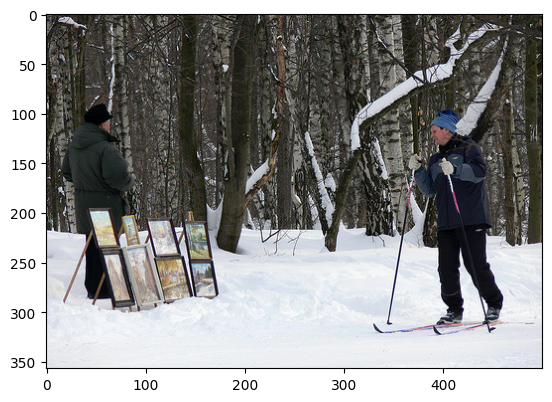

In [ ]:
generate_caption("101669240_b2d3e7f17b.jpg")

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq two dogs playing with each other in the snow endseq


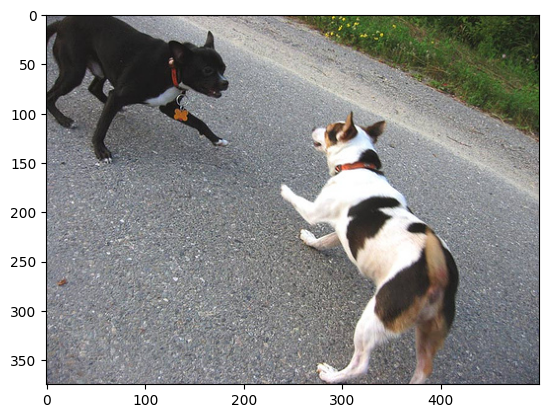

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq little boy sticks his tongue out for the camera another boy looks on endseq
startseq two boys make faces endseq
startseq "two young boys are looking at the camera one smiling the other sticking his tongue out ." endseq
startseq two young boys look up at the camera as one sticks out his tongue endseq
startseq two young boys making silly faces endseq
--------------------Predicted--------------------
startseq two young boys are smiling and laughing endseq


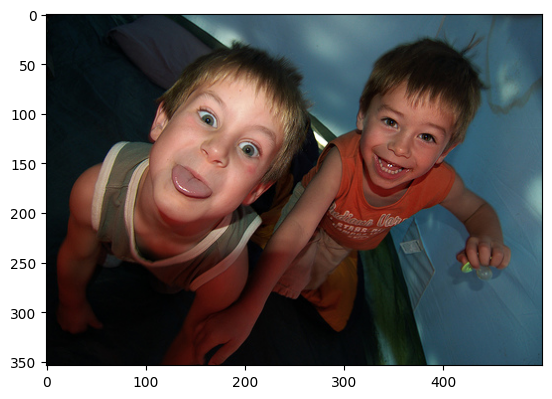

In [ ]:
generate_caption("1079274291_9aaf896cc1.jpg")